# Machine Learning: AllLife Bank Personal Loan Campaign

## Problem Statement

### Context

AllLife Bank is a US bank that has a growing customer base. The majority of these customers are liability customers (depositors) with varying sizes of deposits. The number of customers who are also borrowers (asset customers) is quite small, and the bank is interested in expanding this base rapidly to bring in more loan business and in the process, earn more through the interest on loans. In particular, the management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors).

A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio.

You as a Data scientist at AllLife bank have to build a model that will help the marketing department to identify the potential customers who have a higher probability of purchasing the loan.

### Objective

To predict whether a liability customer will buy personal loans, to understand which customer attributes are most significant in driving purchases, and identify which segment of customers to target more.

### Data Dictionary
* `ID`: Customer ID
* `Age`: Customer’s age in completed years
* `Experience`: #years of professional experience
* `Income`: Annual income of the customer (in thousand dollars)
* `ZIP Code`: Home Address ZIP code.
* `Family`: the Family size of the customer
* `CCAvg`: Average spending on credit cards per month (in thousand dollars)
* `Education`: Education Level. 1: Undergrad; 2: Graduate;3: Advanced/Professional
* `Mortgage`: Value of house mortgage if any. (in thousand dollars)
* `Personal_Loan`: Did this customer accept the personal loan offered in the last campaign? (0: No, 1: Yes)
* `Securities_Account`: Does the customer have securities account with the bank? (0: No, 1: Yes)
* `CD_Account`: Does the customer have a certificate of deposit (CD) account with the bank? (0: No, 1: Yes)
* `Online`: Do customers use internet banking facilities? (0: No, 1: Yes)
* `CreditCard`: Does the customer use a credit card issued by any other Bank (excluding All life Bank)? (0: No, 1: Yes)

## Importing necessary libraries

In [141]:
# Libraries to help with reading and manipulating data

import pandas as pd
import numpy as np

# Library to split data
from sklearn.model_selection import train_test_split

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# Libraries to build decision tree classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# To tune different models
from sklearn.model_selection import GridSearchCV

# To perform statistical analysis
import scipy.stats as stats

# To get diferent metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
    make_scorer,
)

#To load the data from Google drive
from google.colab import drive

## Loading the dataset

In [142]:
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [143]:
loan=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Project2/Loan_Modelling.csv')
data=loan.copy()

## Data Overview

* Observations
* Sanity checks

In [144]:
data.head()

ID  Age  Experience  Income  ZIPCode  Family  CCAvg  Education  Mortgage  \
0   1   25           1      49    91107       4    1.6          1         0   
1   2   45          19      34    90089       3    1.5          1         0   
2   3   39          15      11    94720       1    1.0          1         0   
3   4   35           9     100    94112       1    2.7          2         0   
4   5   35           8      45    91330       4    1.0          2         0   

   Personal_Loan  Securities_Account  CD_Account  Online  CreditCard  
0              0                   1           0       0           0  
1              0                   1           0       0           0  
2              0                   0           0       0           0  
3              0                   0           0       0           0  
4              0                   0           0       0           1

In [145]:
print("The dataset contains {} rows and {} columns".format(data.shape[0],data.shape[1]))

The dataset contains 5000 rows and 14 columns


In [146]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIPCode             5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal_Loan       5000 non-null   int64  
 10  Securities_Account  5000 non-null   int64  
 11  CD_Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [147]:
data.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIPCode               0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal_Loan         0
Securities_Account    0
CD_Account            0
Online                0
CreditCard            0
dtype: int64

* all columns are numerical and there are no missing values

In [148]:
data.describe().T

count          mean          std      min       25%  \
ID                  5000.0   2500.500000  1443.520003      1.0   1250.75   
Age                 5000.0     45.338400    11.463166     23.0     35.00   
Experience          5000.0     20.104600    11.467954     -3.0     10.00   
Income              5000.0     73.774200    46.033729      8.0     39.00   
ZIPCode             5000.0  93169.257000  1759.455086  90005.0  91911.00   
Family              5000.0      2.396400     1.147663      1.0      1.00   
CCAvg               5000.0      1.937938     1.747659      0.0      0.70   
Education           5000.0      1.881000     0.839869      1.0      1.00   
Mortgage            5000.0     56.498800   101.713802      0.0      0.00   
Personal_Loan       5000.0      0.096000     0.294621      0.0      0.00   
Securities_Account  5000.0      0.104400     0.305809      0.0      0.00   
CD_Account          5000.0      0.060400     0.238250      0.0      0.00   
Online              5000.0      0.596800     0.490589      0.0      0.00   
CreditCard          5000.0      0.294000     0.455637      0.0      0.00   

                        50%       75%      max  
ID                   2500.5   3750.25   5000.0  
Age                    45.0     55.00     67.0  
Experience             20.0     30.00     43.0  
Income                 64.0     98.00    224.0  
ZIPCode             93437.0  94608.00  96651.0  
Family                  2.0      3.00      4.0  
CCAvg                   1.5      2.50     10.0  
Education               2.0      3.00      3.0  
Mortgage                0.0    101.00    635.0  
Personal_Loan           0.0      0.00      1.0  
Securities_Account      0.0      0.00      1.0  
CD_Account              0.0      0.00      1.0  
Online                  1.0      1.00      1.0  
CreditCard              0.0      1.00      1.0

* There are negative values in the 'Experience' column, logically there shouldn't be.

In [149]:
print(sorted(set(data.Experience.unique())))

[-3, -2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43]


* It looks like a typo, we will change the negative values with the same positive ones

In [150]:
data.replace({"Experience": {-1:1,-2:2,-3:3}}, inplace=True)

* we also don't need the ID column

In [151]:
data.drop("ID", axis=1, inplace=True)

* we have some columns that make more sense as categorical rather than numerical

In [152]:
data.ZIPCode.nunique()

467

In [153]:
data['ZIPCode']=data['ZIPCode'].astype(str)
data.ZIPCode.str[:2].nunique()

7

* we can take the first 2 digits of the ZIP codes, that way we will have 7 categories

In [154]:
data['ZIPCode']=data.ZIPCode.str[:2]

In [155]:
#switching some columns to categorical
cat_cols=['Education',"Personal_Loan","Securities_Account","CD_Account","Online","CreditCard","ZIPCode"]
data[cat_cols]=data[cat_cols].astype("category")

## Exploratory Data Analysis.

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:

1. What is the distribution of mortgage attribute? Are there any noticeable patterns or outliers in the distribution?
2. How many customers have credit cards?
3. What are the attributes that have a strong correlation with the target attribute (personal loan)?
4. How does a customer's interest in purchasing a loan vary with their age?
5. How does a customer's interest in purchasing a loan vary with their education?

In [156]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [157]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        hue=feature,
        legend=False,
        #order=data[feature].value_counts().index[:n].sort_values(),
        order=data[feature].value_counts().index[:n]
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

In [158]:
# function to plot stacked bar chart


def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart with percentages displayed on the columns.

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]

    # Crosstab for count
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)

    # Crosstab for normalized (percentage)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )

    # Plot stacked bar chart
    ax = tab.plot(kind="bar", stacked=True, figsize=(count + 5, 6))

    # Add percentages on the columns
    for p in ax.patches:
        width, height = p.get_width(), p.get_height()
        x, y = p.get_xy()
        ax.annotate(f'{height:.0%}', (x + width / 2, y + height / 2), ha='center', va='center')

    plt.xticks(rotation=0)

    plt.legend(
        loc="upper left", bbox_to_anchor=(1, 1),
    )
    plt.show()


In [159]:
### function to plot distributions wrt target


def distribution_plot_wrt_target(data, predictor, target, hist_stat="density", hist_xticks=None, boxplot_yticks=None):
    """
    hist_xticks: set a number if more granular xticks for histograms are needed
    boxplot_yticks: set a number if more granular yticks for boxplots are needed
    hist_stat: stat for histogram - 'density' or 'frequency'
    """

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of " + target+" for target "+ str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat=hist_stat,
    )
    if hist_xticks != None:
      axs[0,0].set_xticks(np.arange(data[predictor].min(), data[predictor].max() + 1, hist_xticks))  # Increase the number of x-ticks

    axs[0, 1].set_title("Distribution of "+target+" for target " + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat=hist_stat,
    )
    if hist_xticks != None:
        axs[0,1].set_xticks(np.arange(data[predictor].min(), data[predictor].max() + 1, hist_xticks))  # Increase the number of x-ticks

    axs[1, 0].set_title("Boxplot w.r.t " + target)
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], hue=target, legend=False)
    if boxplot_yticks != None:
      axs[1,0].set_yticks(np.arange(data[predictor].min(), data[predictor].max() + 1, boxplot_yticks))   # Increase the number of y-ticks

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t "+target)
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 1], showfliers=False, hue=target, legend=False)
    if boxplot_yticks != None:
      axs[1,1].set_yticks(np.arange(data[predictor].min(), data[predictor].max() + 1, boxplot_yticks))   # Increase the number of y-ticks

    plt.tight_layout()
    plt.show()

### Univariate Analysis

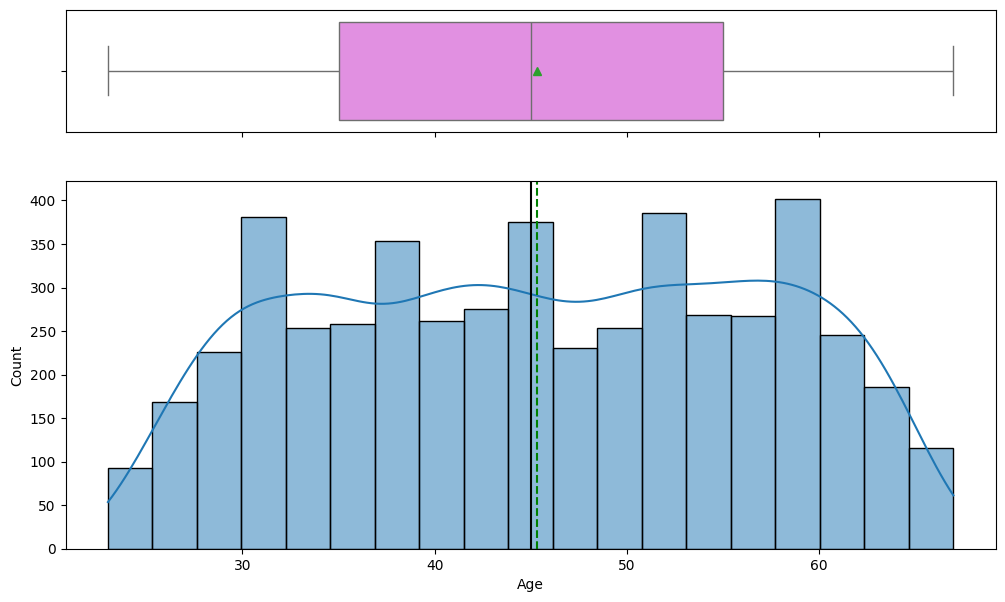

In [160]:
histogram_boxplot(data, "Age", kde=True)

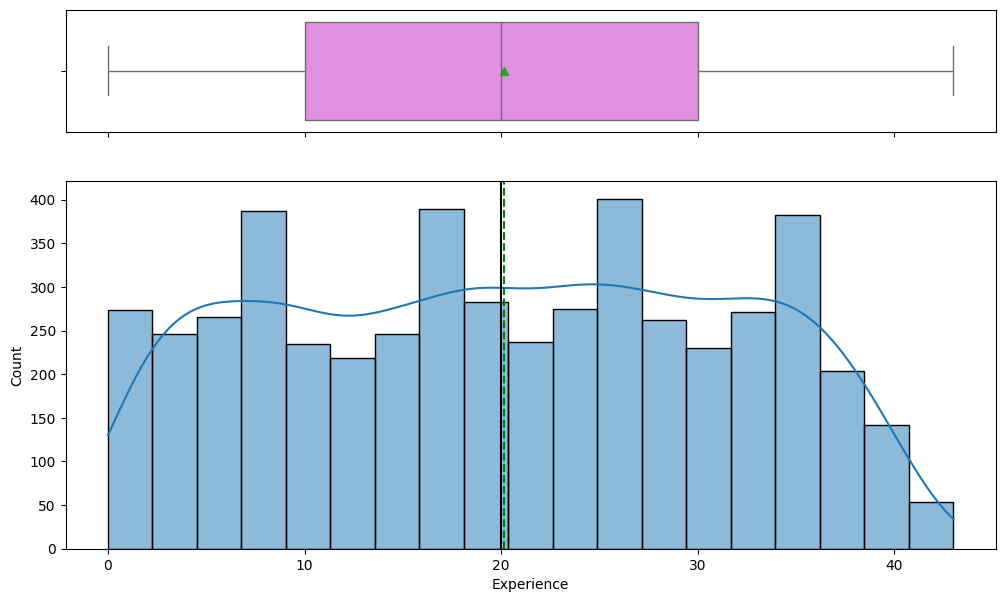

In [161]:
histogram_boxplot(data,"Experience", kde=True)

* "Age" and "Experience" are normally distributed

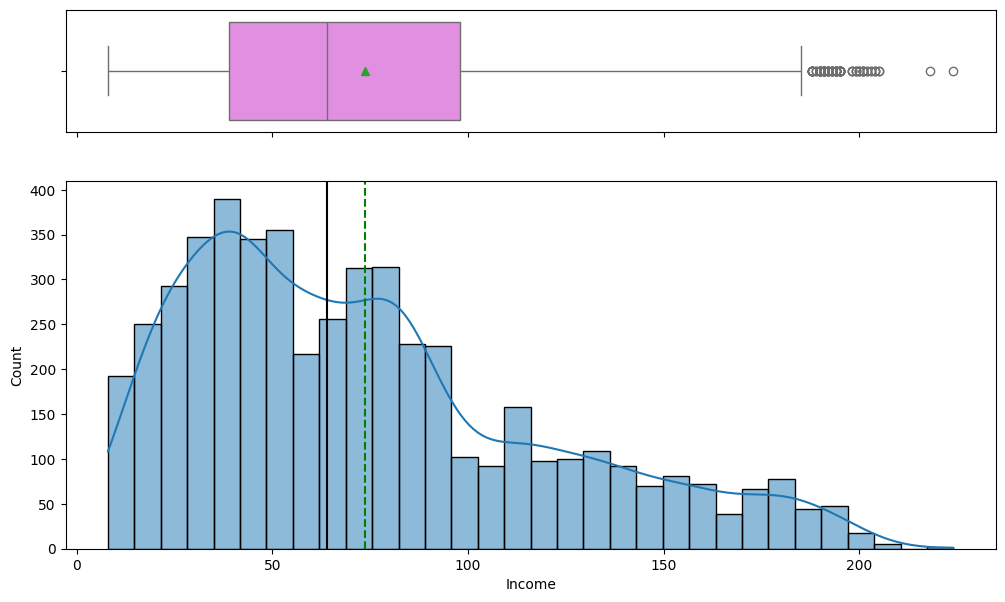

In [162]:
histogram_boxplot(data, "Income", kde=True)

* "Income" is slightly right-skewed

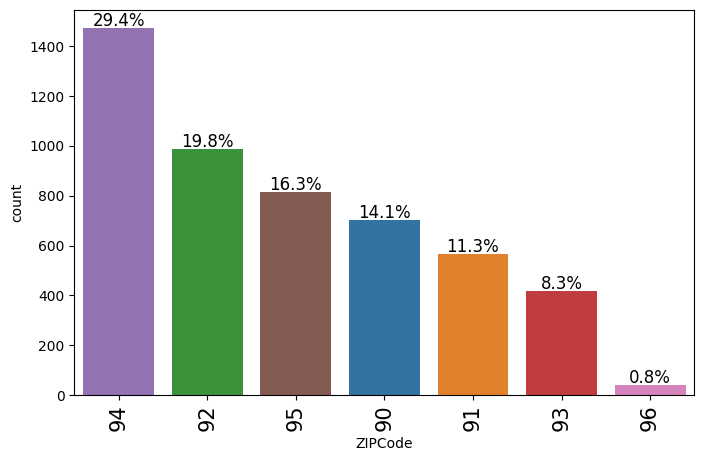

In [163]:
labeled_barplot(data, "ZIPCode", perc=True)

* almost 30% of customers recorded in the dataset live in the areas with Zip codes starting with 94. less than 1% lives in areas with Zip codes starting with 96

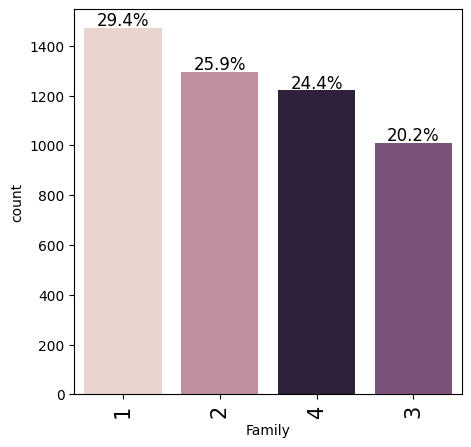

In [164]:
labeled_barplot(data, "Family", perc=True)

* Majority of customers are single (29.4%) or have a partner (25.9%). Less than half have kids

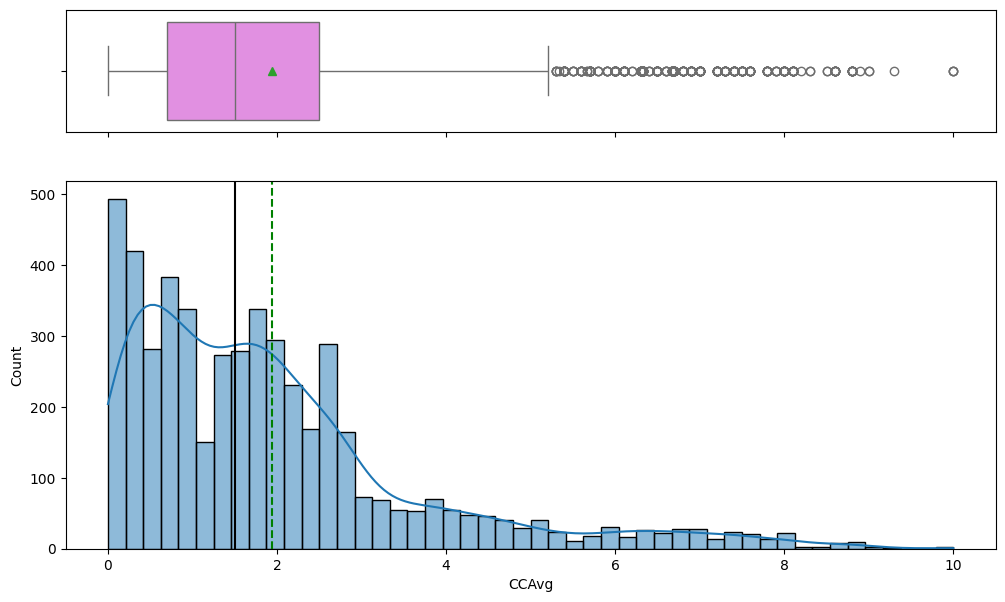

In [165]:
histogram_boxplot(data, "CCAvg", kde=True)

* "CCAvg" is right-skewed with quite a few outliers

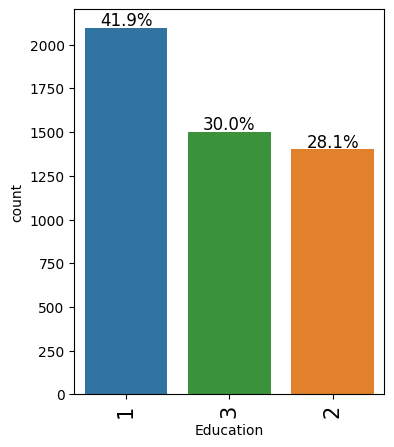

In [166]:
labeled_barplot(data,"Education", perc=True)

* The biggest group of customers (~42%) are Undergrads. Number of customers who are Graduates or Professionals are almost the same (30% and 28.1%)

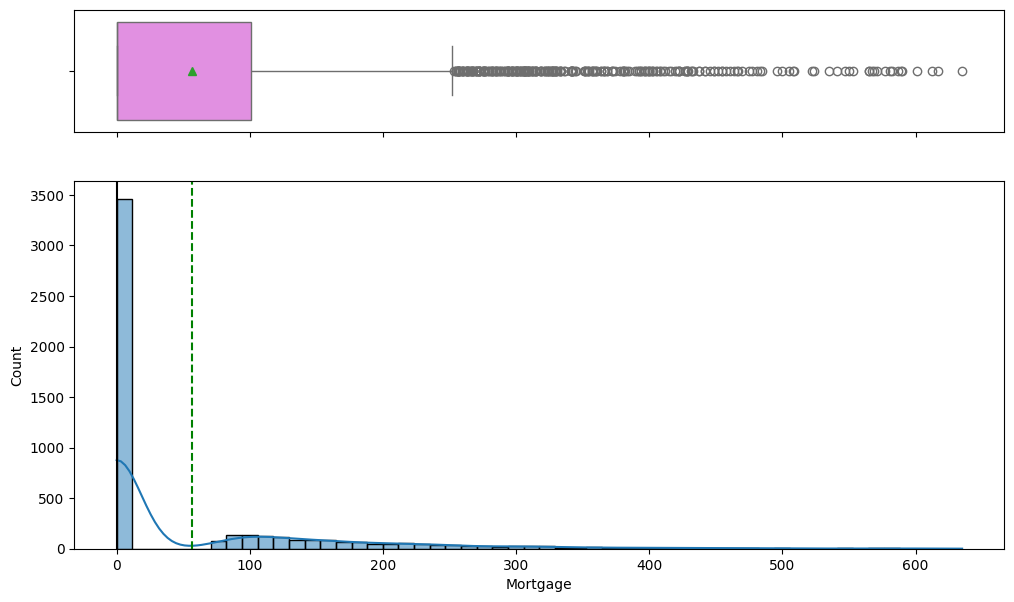

In [167]:
histogram_boxplot(data, "Mortgage", kde=True)

* "Mortgage" is very right-skewed. More than 50% of customers do not have a mortgage

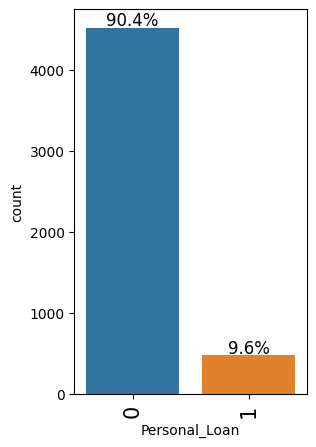

In [168]:
labeled_barplot(data, "Personal_Loan", perc=True)

* Only 9.6% of customers accepted personal loans during the previous campaign

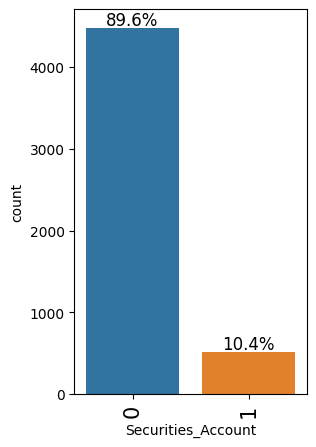

In [169]:
labeled_barplot(data, "Securities_Account", perc=True)

* Only 10.4% of customers have a securities account with the bank

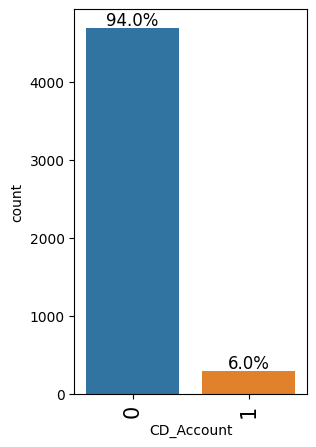

In [170]:
labeled_barplot(data, "CD_Account", perc=True)

* Only 6% of customers have a certificate of deposit accounts with the bank

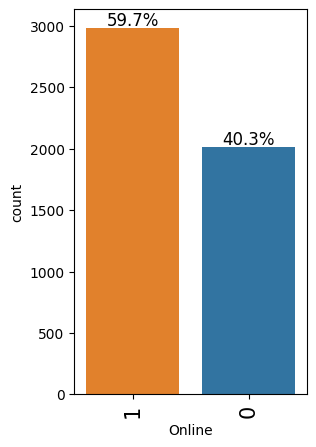

In [171]:
labeled_barplot(data, "Online", perc=True)

* 59.7% of customers use online banking

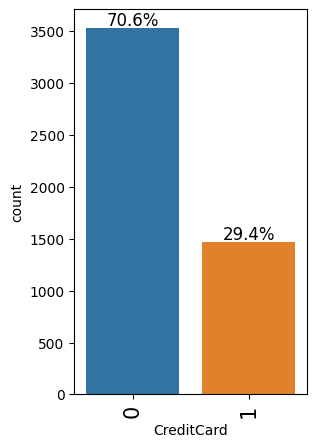

In [172]:
labeled_barplot(data, "CreditCard", perc=True)

* 29% of customers use Credit cards issued by other banks.

Observations:

* "Age" and "Experience" are normally distributed
* "Income" is slightly right-skewed
* almost 30% of customers recorded in the dataset live in the areas with Zip codes starting with 94. less than 1% lives in areas with Zip codes starting with 96
* Majority of customers are single (29.4%) or have a partner (25.9%). Less than half have kids
* "CCAvg" is right-skewed with quite a few outliers
* The biggest group of customers (~42%) are Undergrads. Number of customers who are Graduates or Professionals are almost the same (30% and 28.1%)
* "Mortgage" is very right-skewed. More than 50% of customers do not have a mortgage
* Only 9.6% of customers accepted personal loans during the previous campaign
* Only 10.4% of customers have a securities account with the bank
* Only 6% of customers have a certificate of deposit accounts with the bank
* 59.7% of customers use online banking
* 29% of customers use Credit cards issued by other banks.


### Bivariate Analysis

In [173]:
num_cols=["Age","Experience", "Income","Family","CCAvg","Mortgage"]

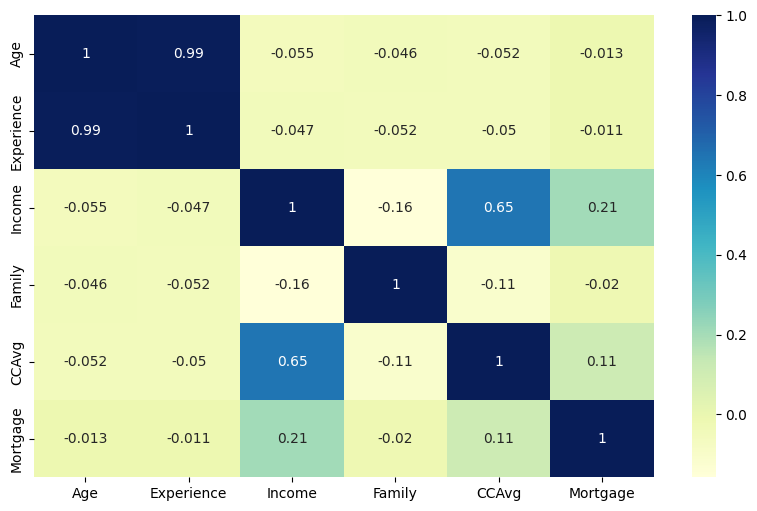

In [174]:
plt.figure(figsize=(10,6))
sns.heatmap(data[num_cols].corr(),annot=True,cmap="YlGnBu")
plt.show()

* "Age" and "Experience" are almost perfectly correlated
* "CCAvg" is correlated with "Income"
* There is a slight correlation between "Income" and "Mortgage"

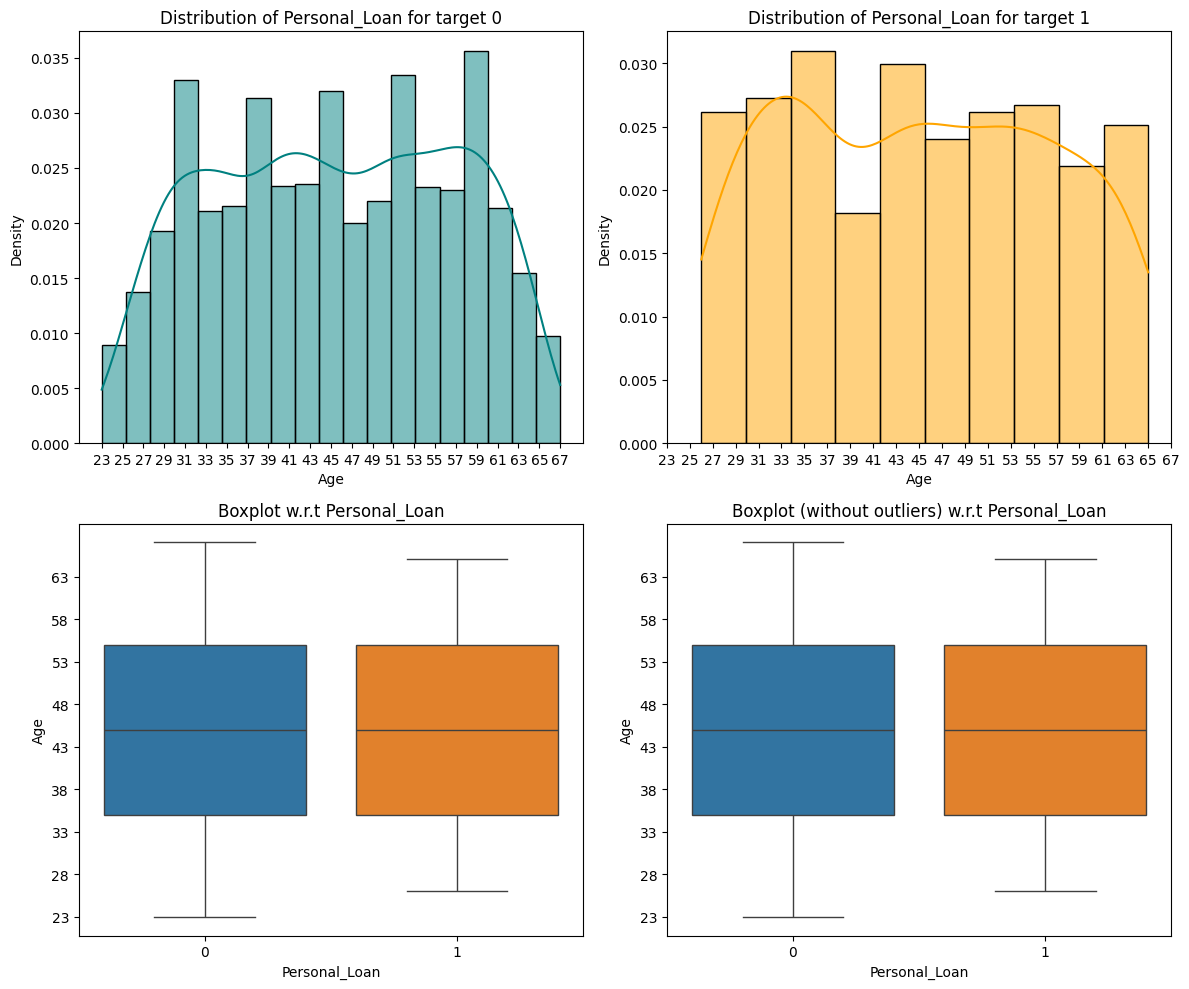

In [175]:
distribution_plot_wrt_target(data, "Age", "Personal_Loan", hist_xticks=2, boxplot_yticks=5)

* None of the customers younger than 26 and older than 65 accepted the loan during the last campaign.
* 50% of customers who accepted the loan last time are between 35 and 55 years old.

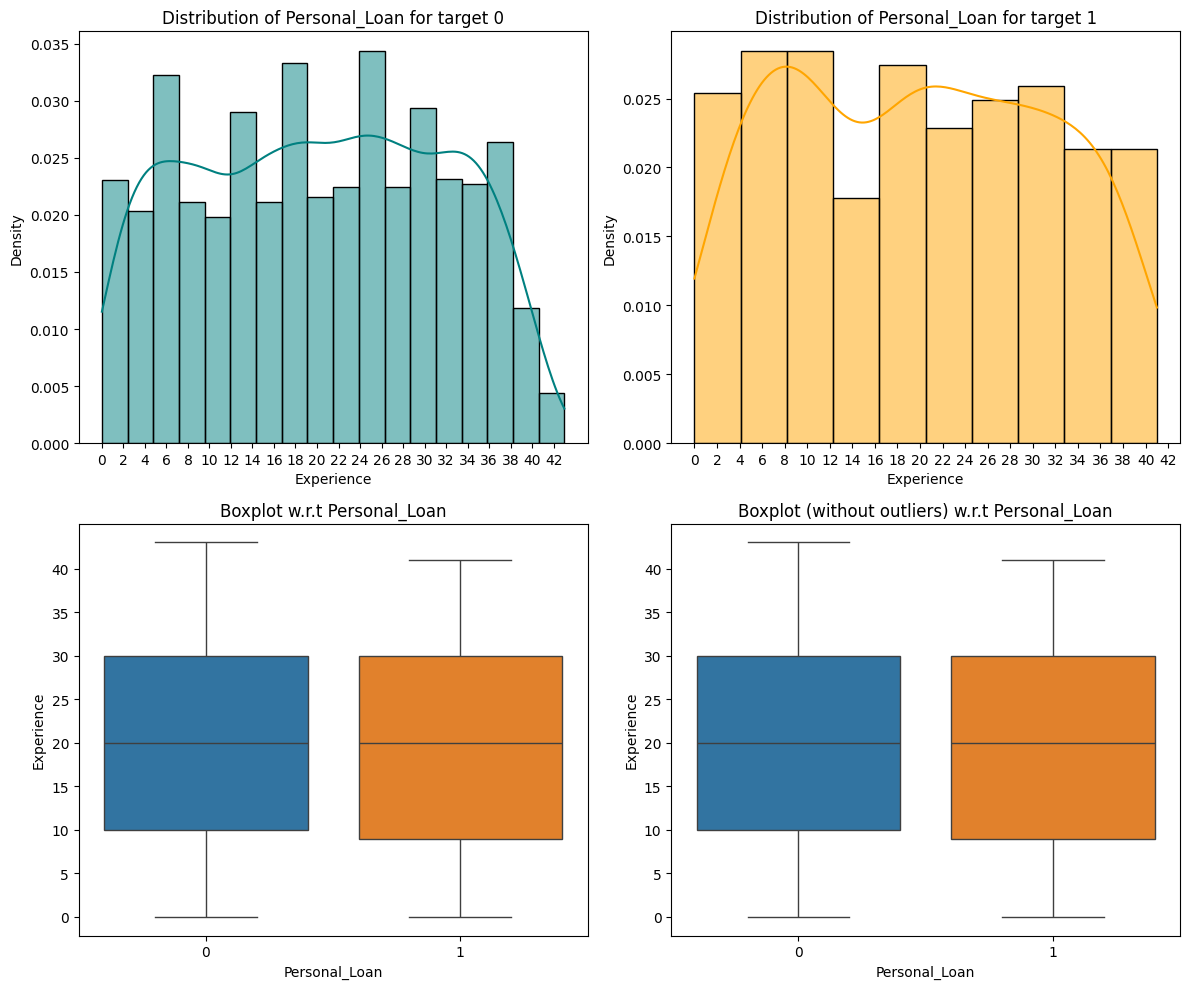

In [176]:
distribution_plot_wrt_target(data, "Experience", "Personal_Loan", hist_xticks=2, boxplot_yticks=5)

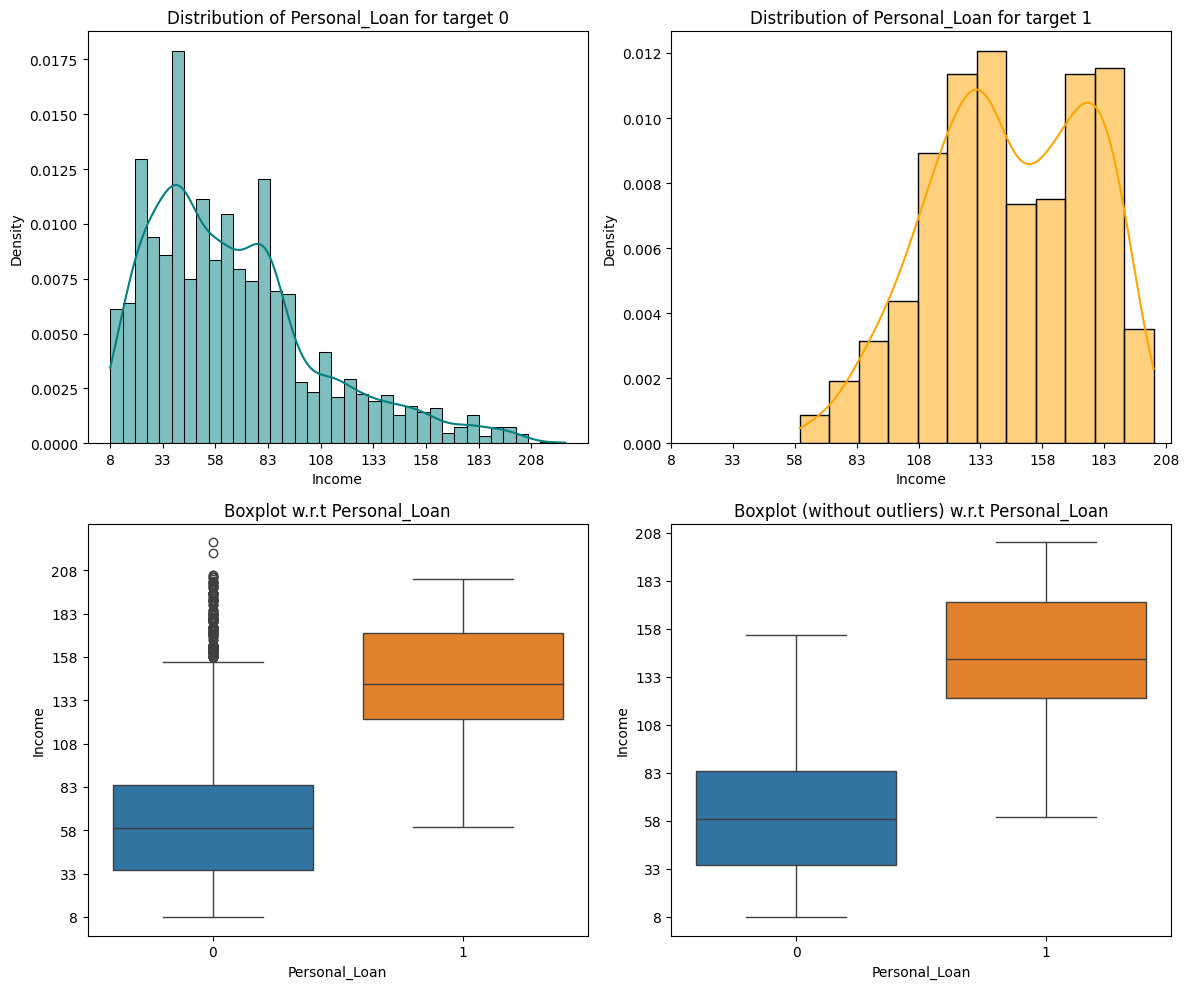

In [177]:
distribution_plot_wrt_target(data, "Income", "Personal_Loan", hist_xticks=25,boxplot_yticks=25)

In [178]:
data[data['Personal_Loan']==1].Income.describe()

count    480.000000
mean     144.745833
std       31.584429
min       60.000000
25%      122.000000
50%      142.500000
75%      172.000000
max      203.000000
Name: Income, dtype: float64

* Customers who accepted the loan previously tend to have higher income
* None of the customers with annual income less than 60 thousand accepted the loan.
* 50% of customers who accepted the loan had the income between 122 and 172 thousand

Personal_Loan     0    1   All
ZIPCode                       
All            4520  480  5000
94             1334  138  1472
92              894   94   988
95              735   80   815
90              636   67   703
91              510   55   565
93              374   43   417
96               37    3    40
------------------------------------------------------------------------------------------------------------------------


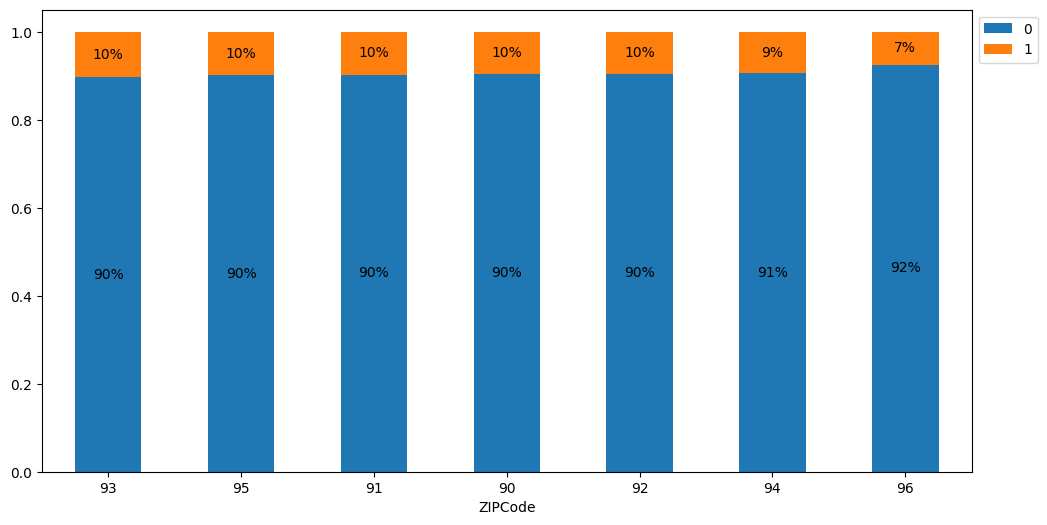

In [179]:
stacked_barplot(data, "ZIPCode", "Personal_Loan")

* Where the customers live doesn't affect whether they accepted the loan more of less.

Personal_Loan     0    1   All
Family                        
All            4520  480  5000
4              1088  134  1222
3               877  133  1010
1              1365  107  1472
2              1190  106  1296
------------------------------------------------------------------------------------------------------------------------


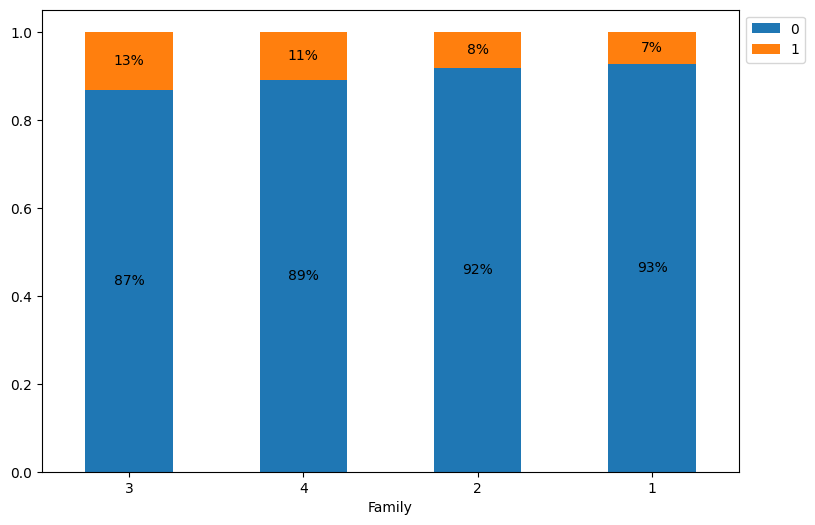

In [180]:
stacked_barplot(data, "Family", "Personal_Loan")

* Customers from families of 3 and 4 (likely with kids) accepted the loan slightly more than single ones or the ones only with a partner

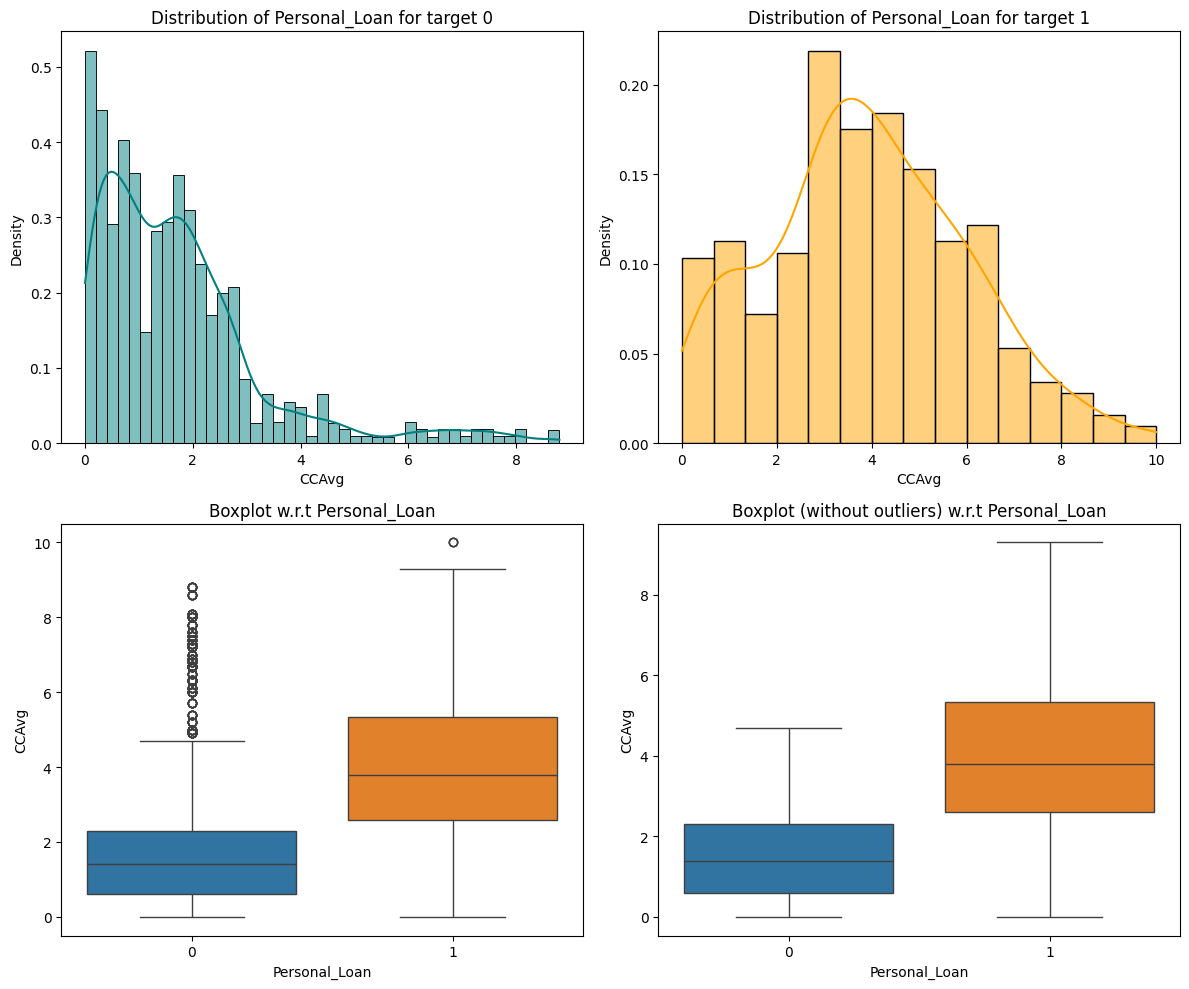

In [181]:
distribution_plot_wrt_target(data, "CCAvg", "Personal_Loan")

In [182]:
data[data['Personal_Loan']==1].CCAvg.describe()

count    480.000000
mean       3.905354
std        2.097681
min        0.000000
25%        2.600000
50%        3.800000
75%        5.347500
max       10.000000
Name: CCAvg, dtype: float64

* Customers who accepted the loan tended to have a higher average spending on credit cards than the ones that did not accept the loan

Personal_Loan     0    1   All
Education                     
All            4520  480  5000
3              1296  205  1501
2              1221  182  1403
1              2003   93  2096
------------------------------------------------------------------------------------------------------------------------


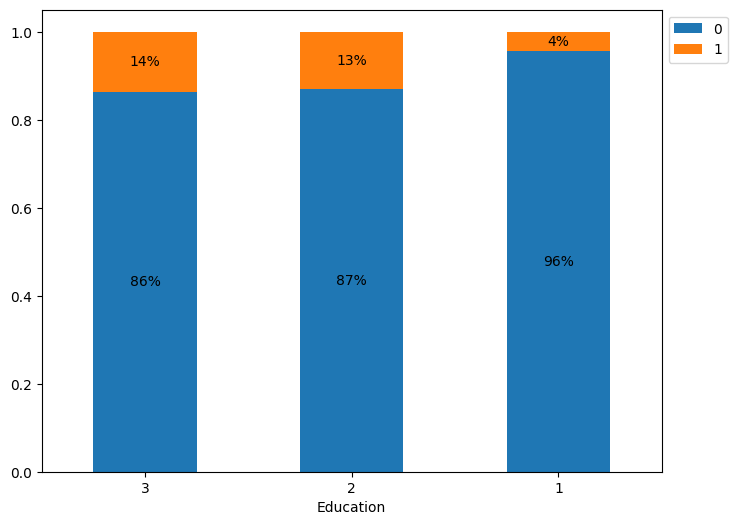

In [183]:
stacked_barplot(data, "Education", "Personal_Loan")

* Professionals and Graduates accepted the loan more frequently than the Undergrads

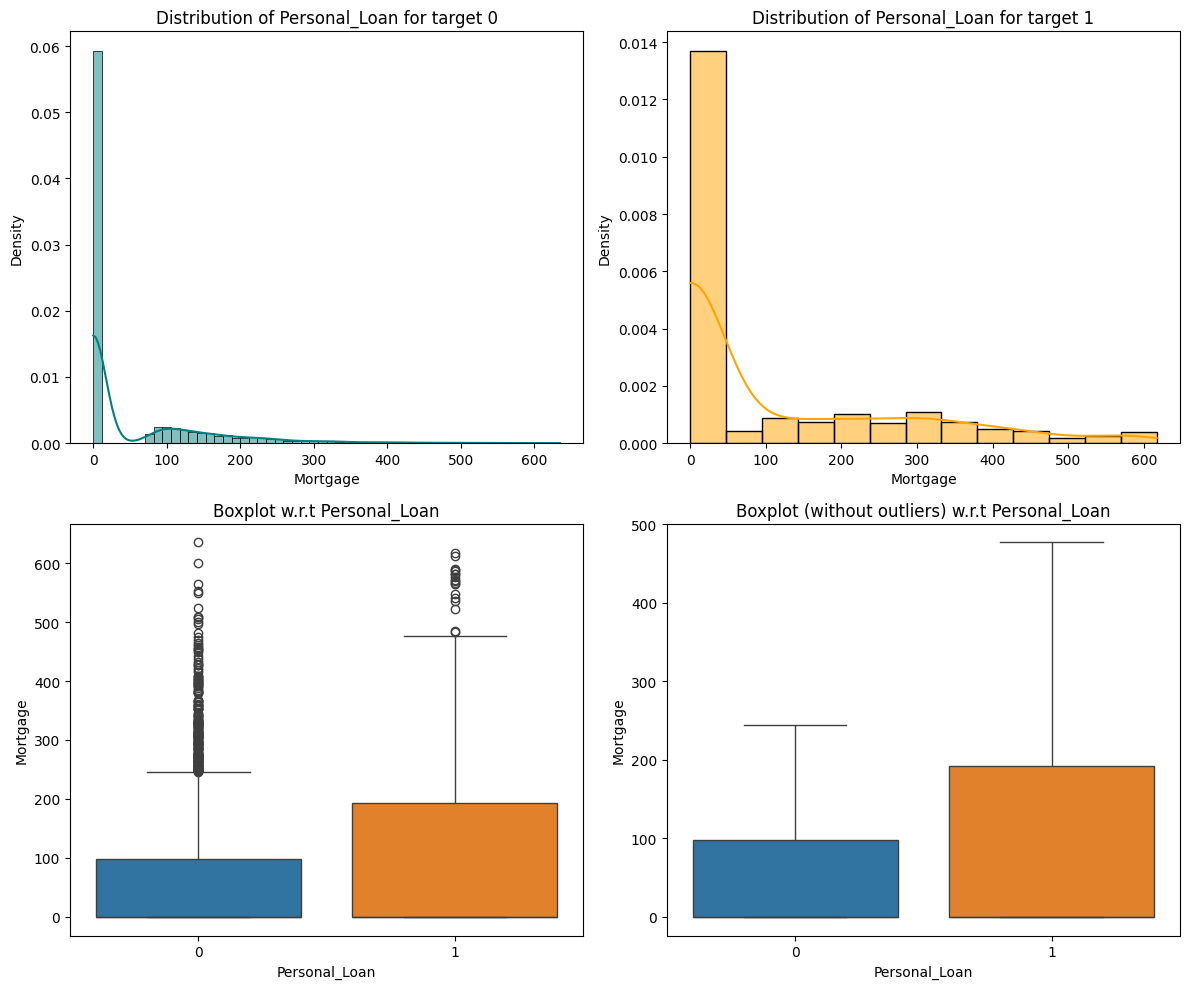

In [184]:
distribution_plot_wrt_target(data, "Mortgage", "Personal_Loan")

* there are a lot of outliers in the 'Mortgage' column. Let's make another column that shows just whether the person has a mortgage or not

In [185]:
data['Mortgage_bin'] = data['Mortgage'].apply(lambda x: 1 if x > 0 else 0)

Personal_Loan     0    1   All
Mortgage_bin                  
All            4520  480  5000
0              3150  312  3462
1              1370  168  1538
------------------------------------------------------------------------------------------------------------------------


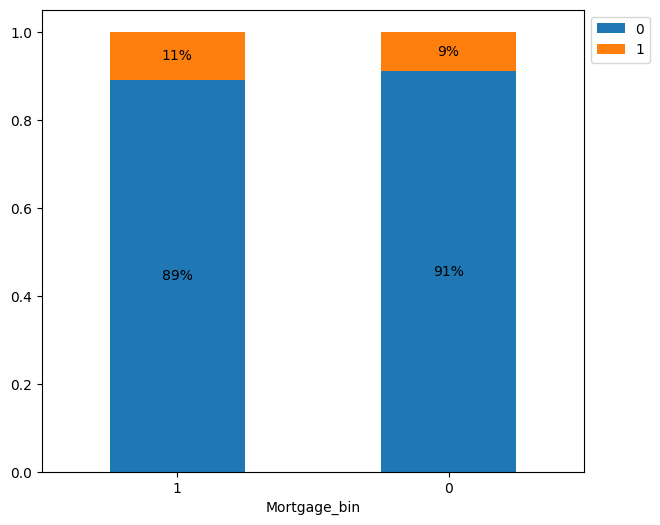

In [186]:
stacked_barplot(data, "Mortgage_bin", "Personal_Loan")

* Presence of mortgage doesn't appear to have a significant influence on whether the person accepted the loan or not (11% vs 9%)

In [187]:
# Removing the 'Mortgage_bin' column because we don't need it anymore
data=data.drop(columns=['Mortgage_bin'])

Personal_Loan          0    1   All
Securities_Account                 
All                 4520  480  5000
0                   4058  420  4478
1                    462   60   522
------------------------------------------------------------------------------------------------------------------------


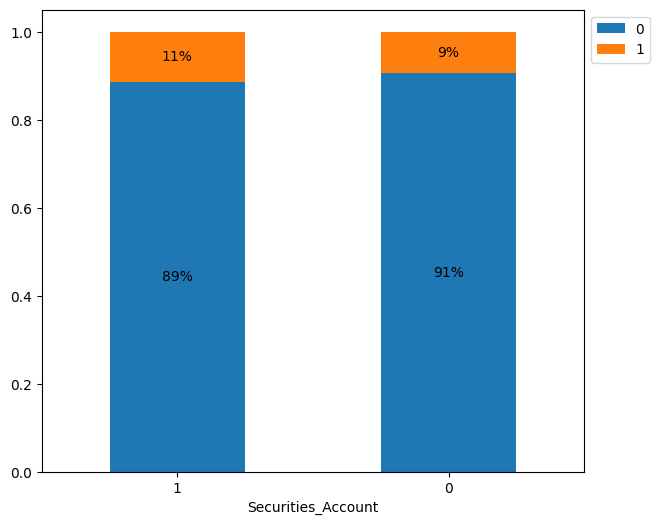

In [188]:
stacked_barplot(data, "Securities_Account","Personal_Loan")

* Ownership of a securities account doesn't seem to affect the acceptance of the loan significantly

Personal_Loan     0    1   All
CD_Account                    
All            4520  480  5000
0              4358  340  4698
1               162  140   302
------------------------------------------------------------------------------------------------------------------------


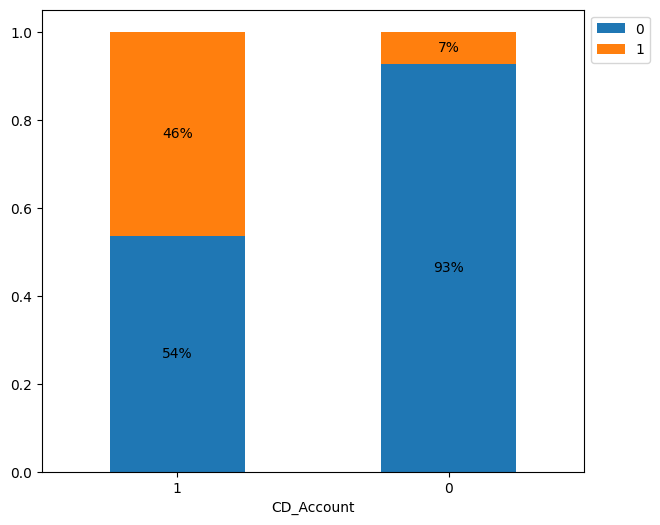

In [189]:
stacked_barplot(data, "CD_Account", "Personal_Loan")

* 46% of customers who have a certificate or deposit account also accepted the loan previously.

Personal_Loan     0    1   All
Online                        
All            4520  480  5000
1              2693  291  2984
0              1827  189  2016
------------------------------------------------------------------------------------------------------------------------


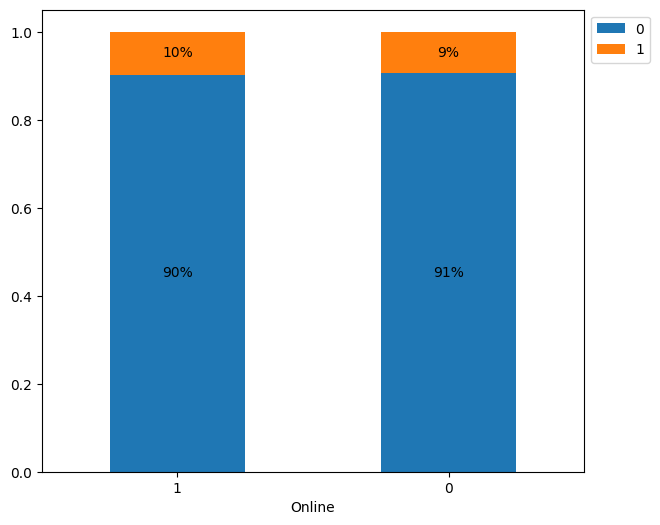

In [190]:
stacked_barplot(data, "Online", "Personal_Loan")

* Whether the customer uses online banking or not doesn't seem to affect whether they accepted the loan or not

Personal_Loan     0    1   All
CreditCard                    
All            4520  480  5000
0              3193  337  3530
1              1327  143  1470
------------------------------------------------------------------------------------------------------------------------


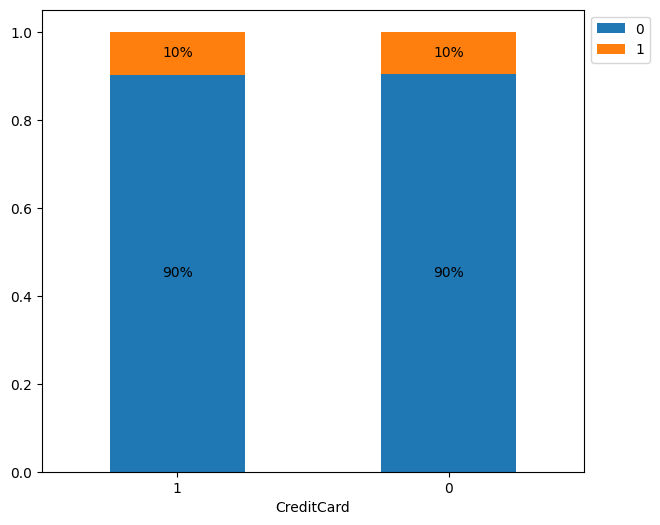

In [191]:
stacked_barplot(data, "CreditCard", "Personal_Loan")

* Usage of credit cards from other banks didn't affect whether customers accepted the loan or not.

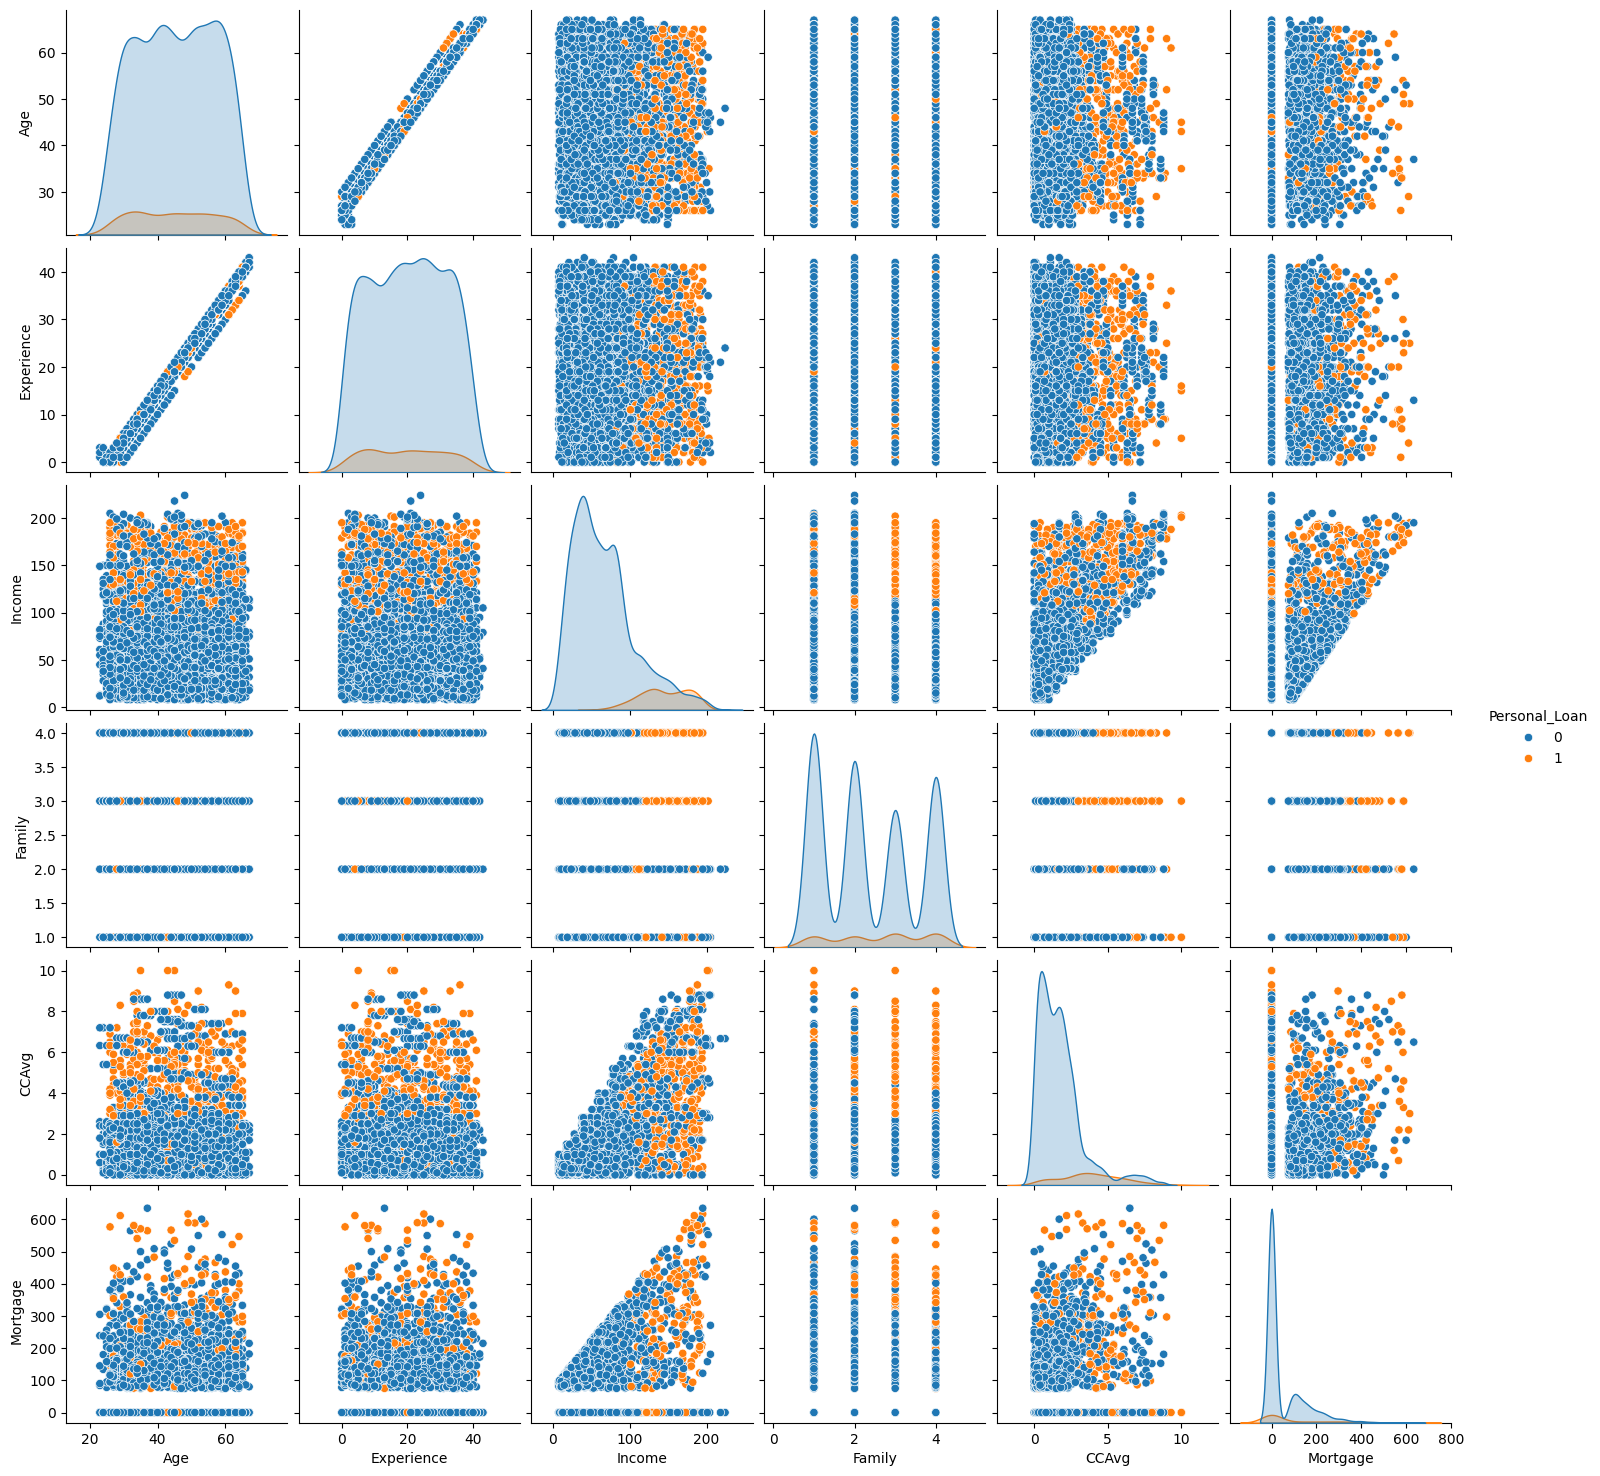

In [192]:
sns.pairplot(data=data,hue="Personal_Loan");
plt.show()

Observations:
* "Age" and "Experience" are almost perfectly correlated
* "CCAvg" is correlated with "Income"
* There is a slight correlation between "Income" and "Mortgage"
* None of the customers younger than 26 and older than 65 accepted the loan during the last campaign.
* 50% of customers who accepted the loan last time are between 35 and 55 years old.
* Customers who accepted the loan previously tend to have higher income
* None of the customers with annual income less than 60 thousand accepted the loan. 50% of customers who accepted the loan had the income between 122 and 172 thousand
* Where the customers live doesn't affect whether they accepted the loan more of less.
* Customers from families of 3 and 4 (likely with kids) accepted the loan slightly more than single ones or the ones only with a partner
* Customers who accepted the loan tended to have a higher average spending on credit cards than the ones that did not accept the loan
* Professionals and Graduates accepted the loan more frequently than the Undergrads
* Presence of mortgage doesn't appear to have a significant influence on whether the person accepted the loan or not (11% vs 9%)
* Ownership of a securities account doesn't seem to affect the acceptance of the loan significantly
* 46% of customers who have a certificate or deposit account also accepted the loan previously.
* Whether the customer uses online banking or not doesn't seem to affect whether they accepted the loan or not
* Usage of credit cards from other banks didn't affect whether customers accepted the loan or not.

## Data Preprocessing

* Missing value treatment
* Feature engineering (if needed)
* Outlier detection and treatment (if needed)
* Preparing data for modeling
* Any other preprocessing steps (if needed)

In [193]:
def find_outliers_IQR(df):
   q1=df.quantile(0.25)
   q3=df.quantile(0.75)
   IQR=q3-q1
   outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]
   return outliers

In [194]:
for col in num_cols:
  outliers=find_outliers_IQR(data[col])
  print("In {} column there are:\n {} outliers ({:.2f}%)\nMin outlier value: {}\nMax outlier value: {}".format(col,len(outliers),len(outliers)/len(data[col])*100,outliers.min(),outliers.max()))
  print('-'*40)


In Age column there are:
 0 outliers (0.00%)
Min outlier value: nan
Max outlier value: nan
----------------------------------------
In Experience column there are:
 0 outliers (0.00%)
Min outlier value: nan
Max outlier value: nan
----------------------------------------
In Income column there are:
 96 outliers (1.92%)
Min outlier value: 188
Max outlier value: 224
----------------------------------------
In Family column there are:
 0 outliers (0.00%)
Min outlier value: nan
Max outlier value: nan
----------------------------------------
In CCAvg column there are:
 324 outliers (6.48%)
Min outlier value: 5.3
Max outlier value: 10.0
----------------------------------------
In Mortgage column there are:
 291 outliers (5.82%)
Min outlier value: 253
Max outlier value: 635
----------------------------------------


* 3 columns in the dataset have outliers - 'Income', 'CCAvg' and 'Mortgage'. Let's take a closer look at them

In [195]:
outl=['Income','CCAvg','Mortgage']
data[outl].describe().T

count       mean         std  min   25%   50%    75%    max
Income    5000.0  73.774200   46.033729  8.0  39.0  64.0   98.0  224.0
CCAvg     5000.0   1.937938    1.747659  0.0   0.7   1.5    2.5   10.0
Mortgage  5000.0  56.498800  101.713802  0.0   0.0   0.0  101.0  635.0

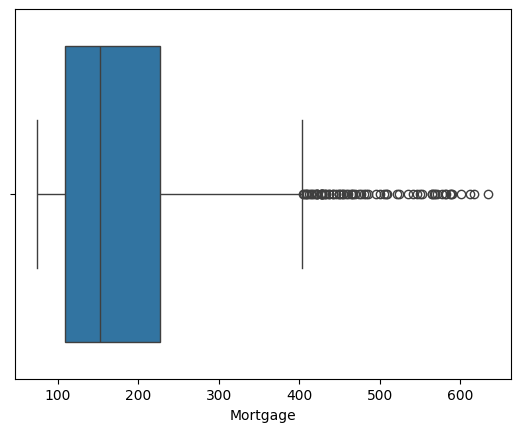

In [196]:
sns.boxplot(data=data[data['Mortgage']>0], x='Mortgage');

In [197]:
q1_m=data.loc[data['Mortgage']>0,'Mortgage'].quantile(0.25)
q3_m=data.loc[data['Mortgage']>0,'Mortgage'].quantile(0.75)
IQR_m=data.loc[data['Mortgage']>0,'Mortgage'].quantile(0.75)-data.loc[data['Mortgage']>0,'Mortgage'].quantile(0.25)

print("There are {} ({:.2f}%) non-zero values in the Mortgage column".format(data.loc[data['Mortgage']>0,'Mortgage'].count(),(data.loc[data['Mortgage']>0,'Mortgage'].count()/data.loc[:,'Mortgage'].count())*100))
print('-'*50)
print("stats for non-zero values:\n",data.loc[data['Mortgage']>0,'Mortgage'].describe())
print('-'*50)
print("Quartiles and upper whisker for Mortgage column if we take non zero values:\n"
      "Q1: {}\nQ3: {}\nQ3+1.5*IQR: {}".format(q1_m,q3_m,q3_m+1.5*IQR_m) )
print('-'*50)
print("Outliers from non-zero values in Mortgage column:\n {} ({:.2f}%)".format(data.loc[data['Mortgage']>(q3_m+1.5*IQR_m),'Mortgage'].count(),data.loc[data['Mortgage']>(q3_m+1.5*IQR_m),'Mortgage'].count()/data.loc[data['Mortgage']>0,'Mortgage'].count()))


There are 1538 (30.76%) non-zero values in the Mortgage column
--------------------------------------------------
stats for non-zero values:
 count    1538.000000
mean      183.676203
std       101.361226
min        75.000000
25%       109.000000
50%       153.000000
75%       227.000000
max       635.000000
Name: Mortgage, dtype: float64
--------------------------------------------------
Quartiles and upper whisker for Mortgage column if we take non zero values:
Q1: 109.0
Q3: 227.0
Q3+1.5*IQR: 404.0
--------------------------------------------------
Outliers from non-zero values in Mortgage column:
 70 (0.05%)


I think we can try encoding 'Mortgage' column into 3 categorical values:
* 0 - no mortgage
* 1 - 'small' mortgage (<227:  75% people with mortgage have one below this)
* 2 - 'large' mortgage (>=227)

In [198]:
data['Mortgage'] = data['Mortgage'].apply(lambda x: 0 if x == 0 else (1 if x < 227 else 2))
data['Mortgage']=data['Mortgage'].astype("category")

* for CCAvg and Income - let's do some additional EDA for those columns.

In [199]:
def plot_boxplots(data, numerical_col, categorical_cols):
    """
    Plot boxplots of a numerical column against multiple categorical columns in a grid layout.

    Parameters:
    data: The dataframe containing the data.
    numerical_col (str): The name of the numerical column.
    categorical_cols (list of str): List of names of the categorical columns.
    """
    num_plots = len(categorical_cols)
    num_rows = (num_plots + 3) // 4  # Calculate the number of rows needed
    fig, axes = plt.subplots(num_rows, 4, figsize=(20, 5 * num_rows))
    axes = axes.flatten()  # Flatten the 2D array of axes

    for idx, col in enumerate(categorical_cols):
        sns.boxplot(x=col, y=numerical_col, data=data, ax=axes[idx], hue=col, legend=False)
        axes[idx].set_title(f'Boxplot of {numerical_col} by {col}')

    # Hide any remaining empty subplots
    for i in range(idx + 1, len(axes)):
        fig.delaxes(axes[i])

    plt.tight_layout()
    plt.show()

In [200]:
cat_cols=['ZIPCode','Family','Education','Mortgage','Personal_Loan','Securities_Account','CD_Account','Online','CreditCard',]

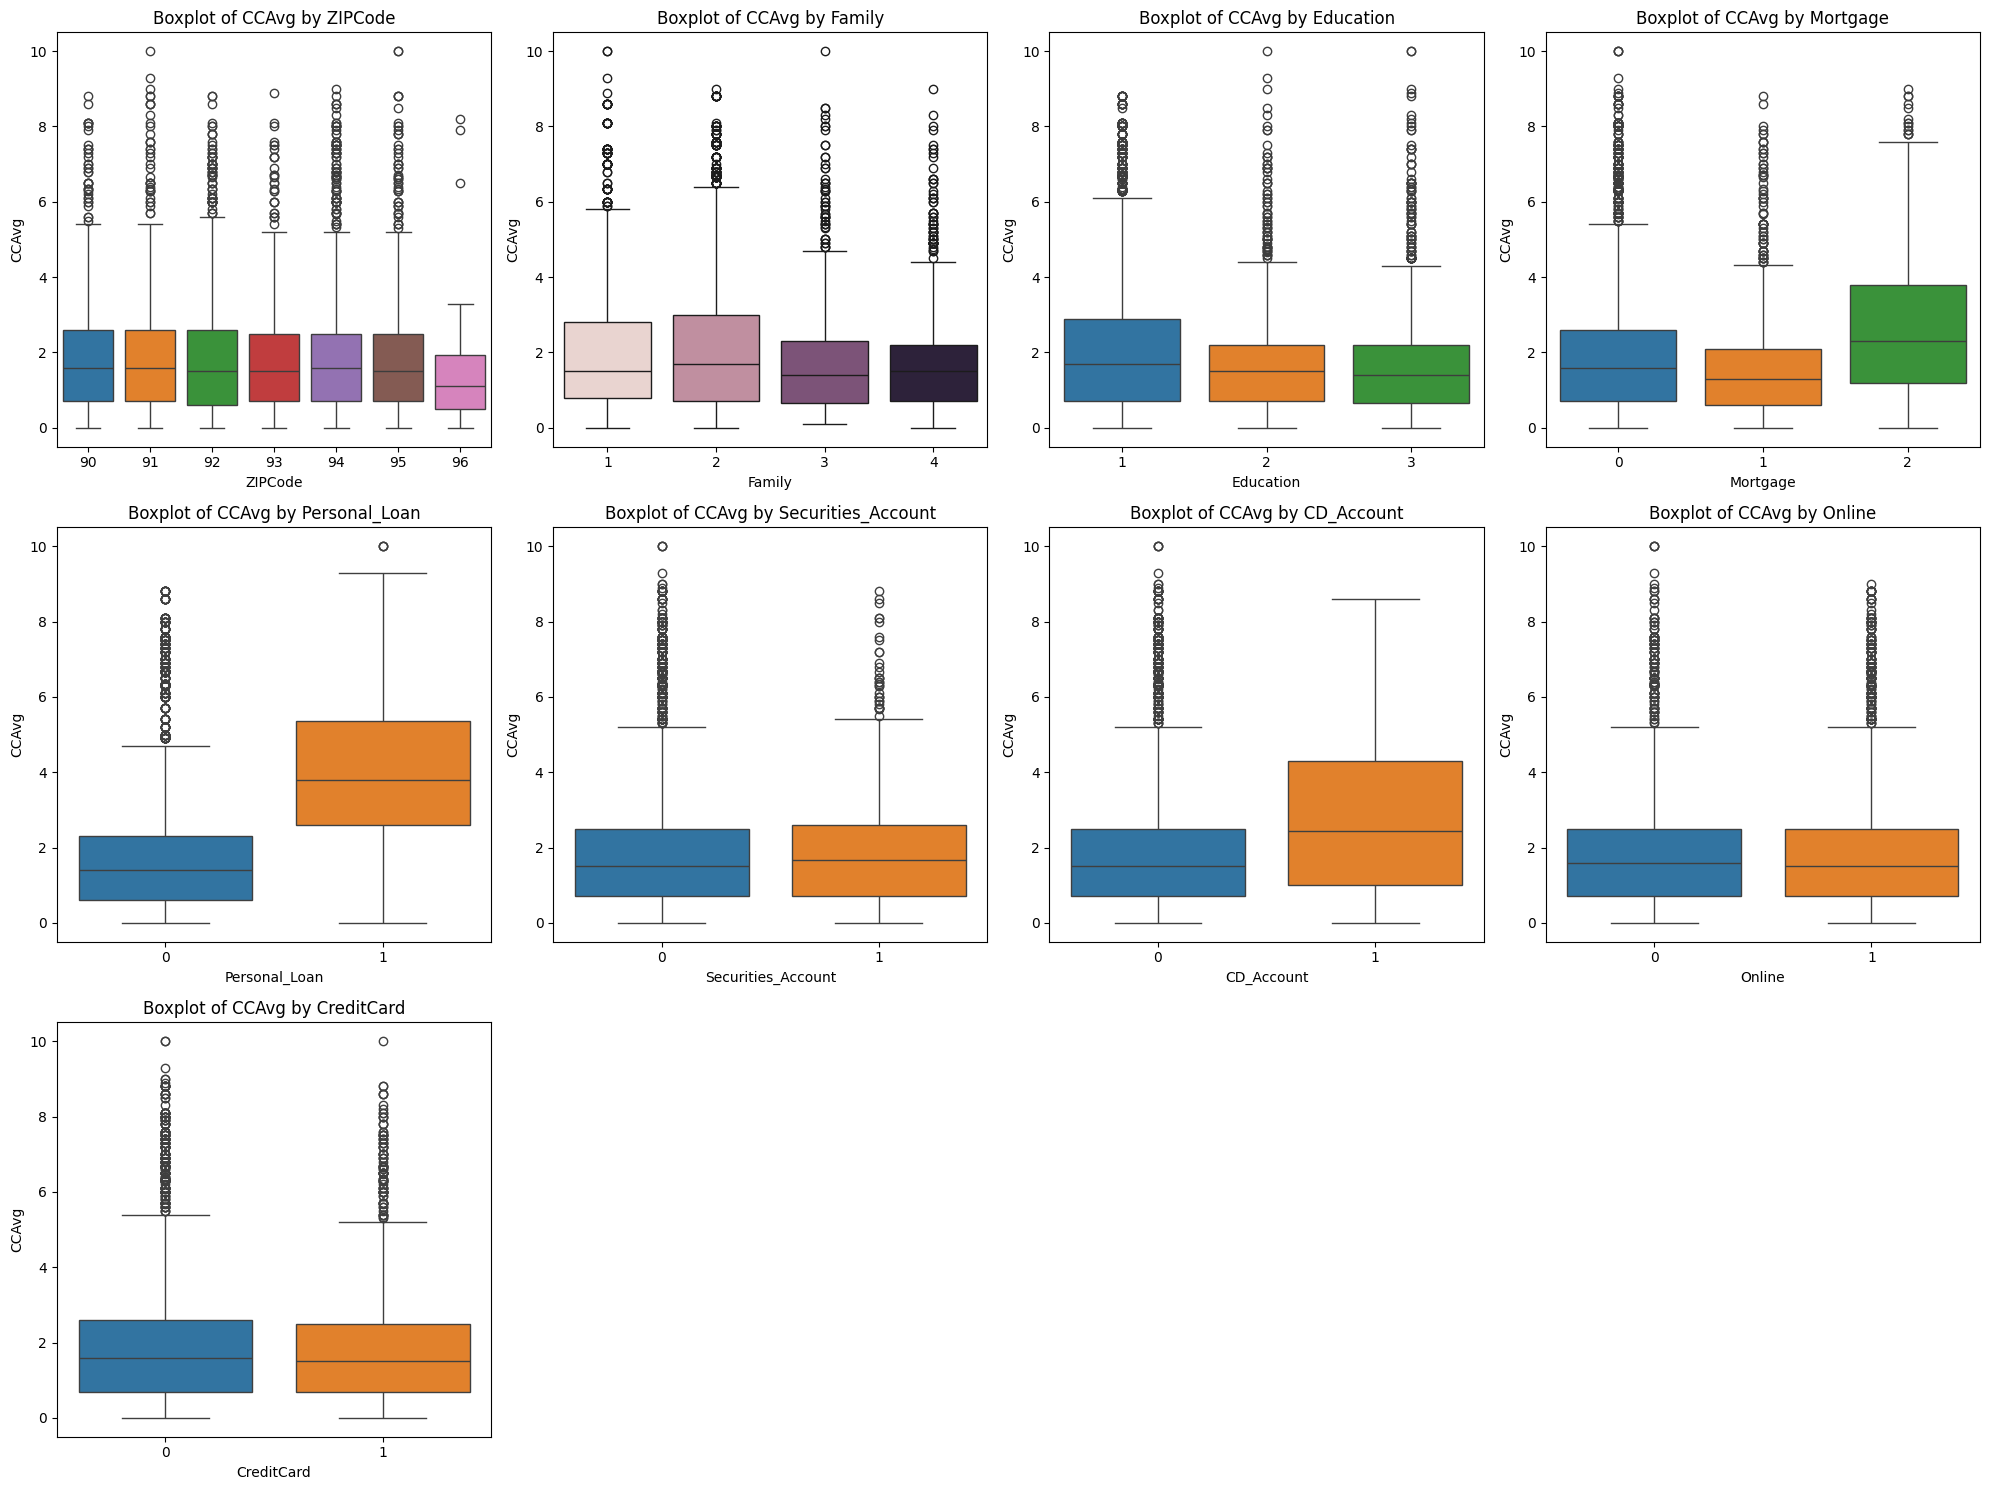

In [201]:
plot_boxplots(data,'CCAvg',cat_cols)

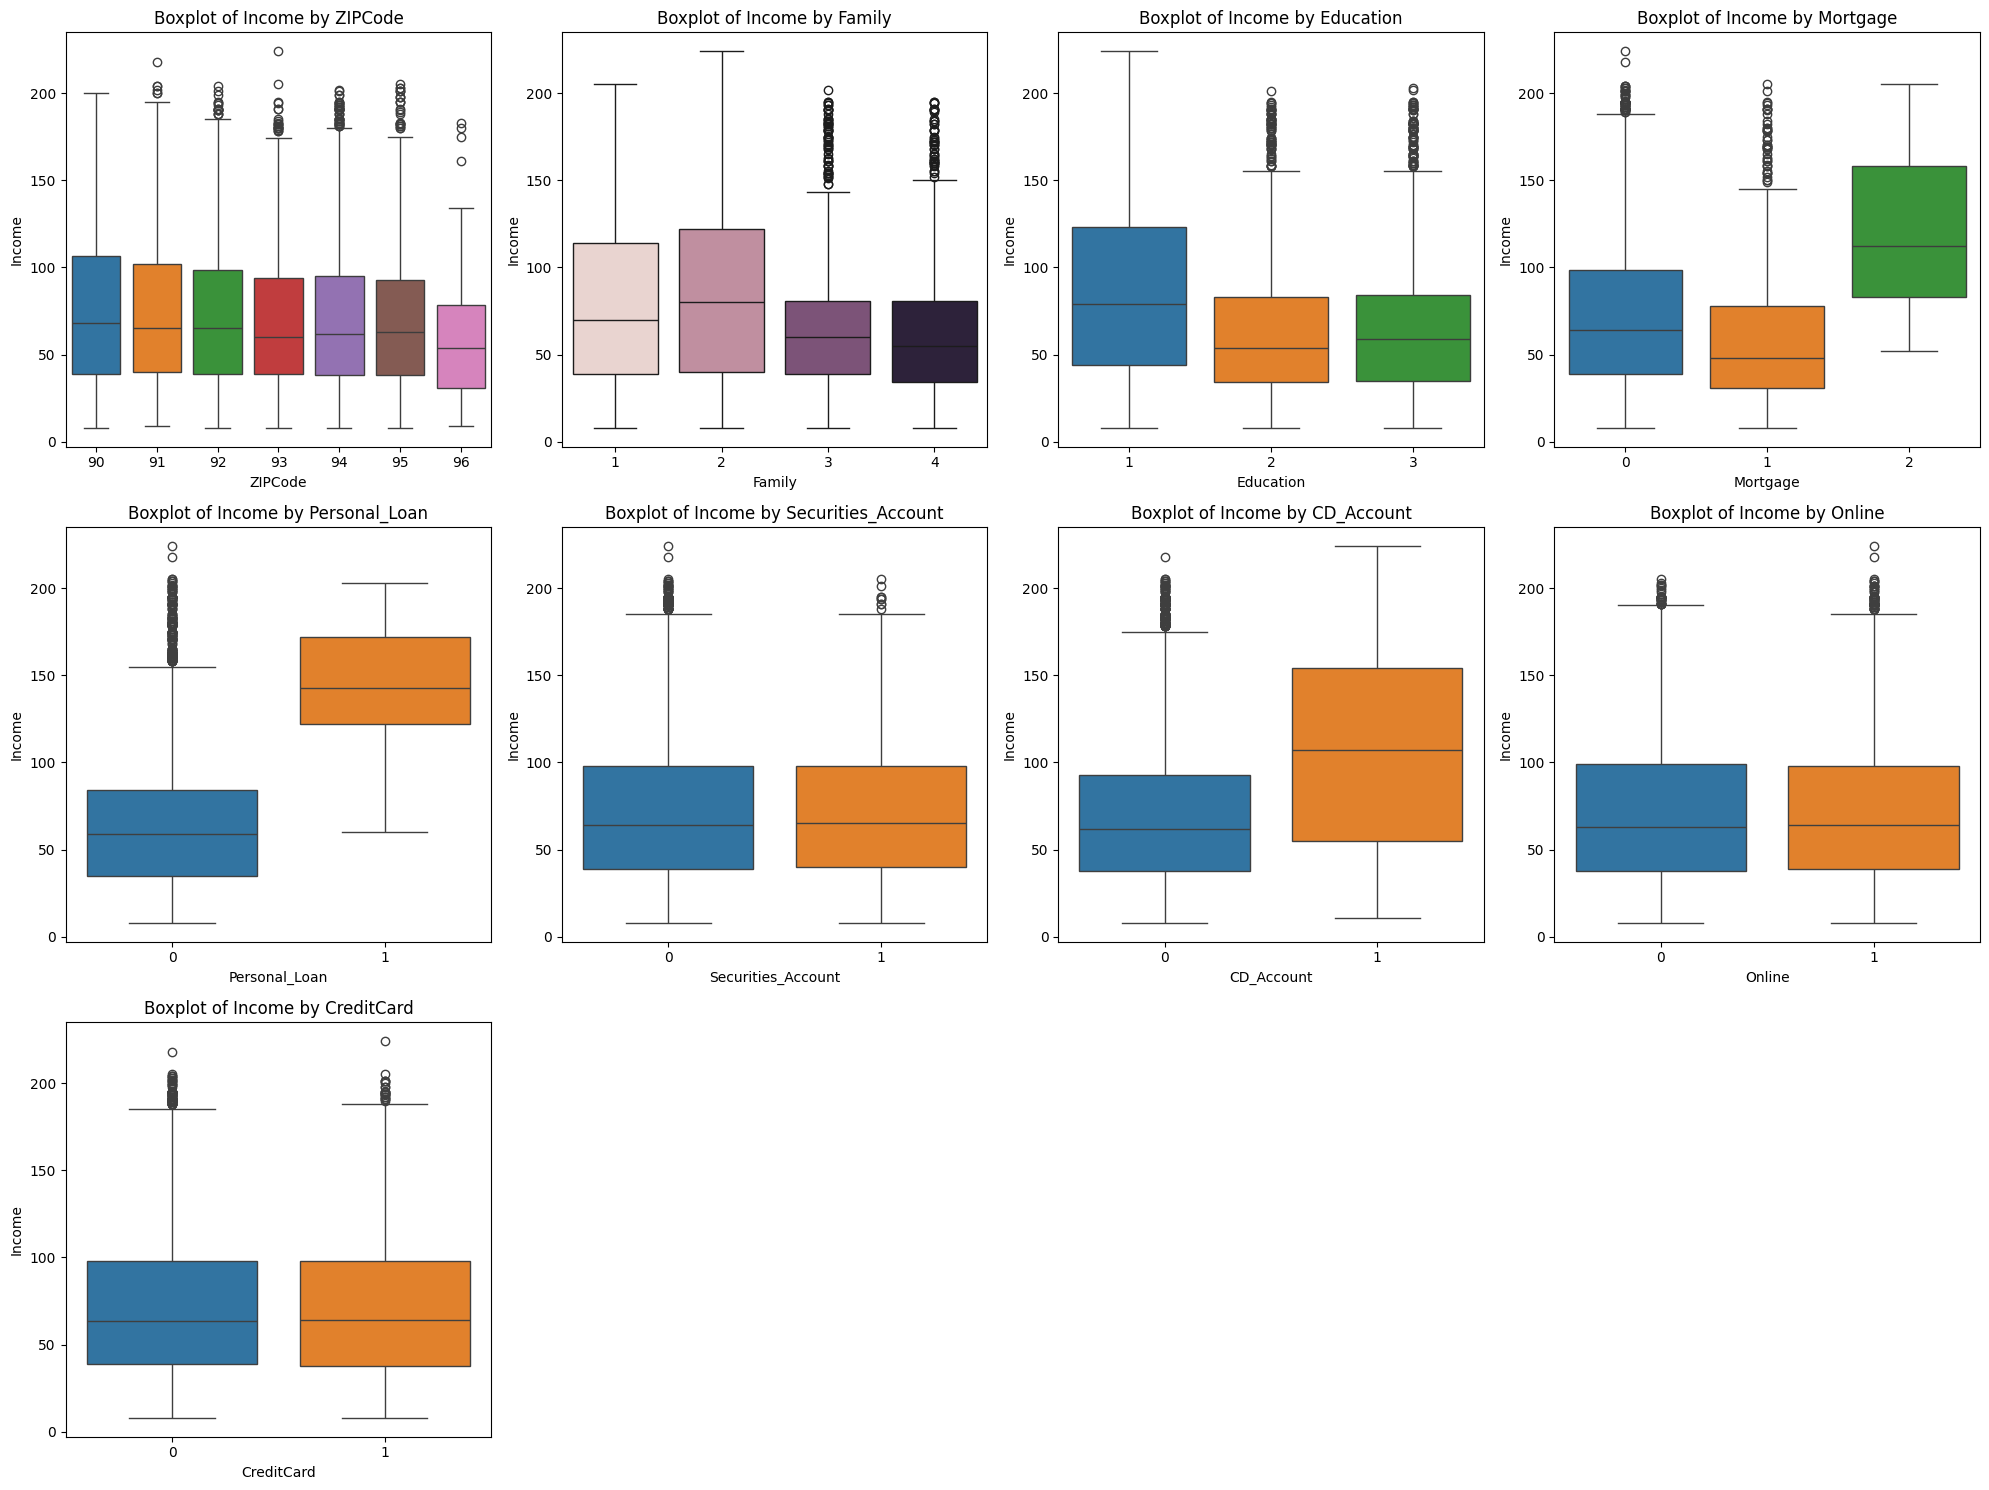

In [202]:
plot_boxplots(data,'Income',cat_cols)

* it doesn't look like the outliers in 'CCAvg' and 'Income' can be easily grouped by some other attribute, so that way we can't figure out a mean to impute the outliers with. It is also unclear how we can cap them.
* I'm leaving both columns are they are, not dropping the outliers and not replacing them

In [203]:
X=data.drop(columns=['Personal_Loan','Experience'])
y=data['Personal_Loan']
X=pd.get_dummies(X, columns=['ZIPCode','Education','Mortgage'], drop_first=True)

In [204]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state=1)

In [205]:
print("Number of rows in the train data: {}\n"
      "Number of rows in the test data: {}\n\n"
      "Percentage of classes in the training set: {}\n\n"
      "Percentage of classes in the test set: {}".format(X_train.shape[0],X_test.shape[0],y_train.value_counts(normalize=True),y_test.value_counts(normalize=True)))


Number of rows in the train data: 3500
Number of rows in the test data: 1500

Percentage of classes in the training set: Personal_Loan
0    0.905429
1    0.094571
Name: proportion, dtype: float64

Percentage of classes in the test set: Personal_Loan
0    0.900667
1    0.099333
Name: proportion, dtype: float64


## Model Building

### Model Evaluation Criterion

In [206]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [207]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

### Model Building

In [208]:
model = DecisionTreeClassifier(criterion="gini", random_state=1)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

### Checking model performance on training set

In [209]:
decision_tree_perf_train = model_performance_classification_sklearn(
    model, X_train, y_train
)
decision_tree_perf_train

Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0

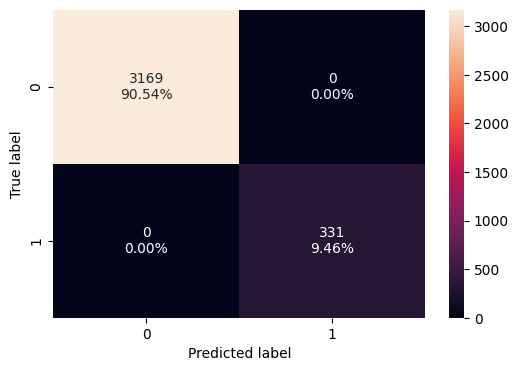

In [210]:
confusion_matrix_sklearn(model, X_train, y_train)

### Checking model performance on test set

In [211]:
decision_tree_perf_test = model_performance_classification_sklearn(
    model, X_test, y_test
)
decision_tree_perf_test

Accuracy    Recall  Precision        F1
0     0.986  0.919463   0.938356  0.928814

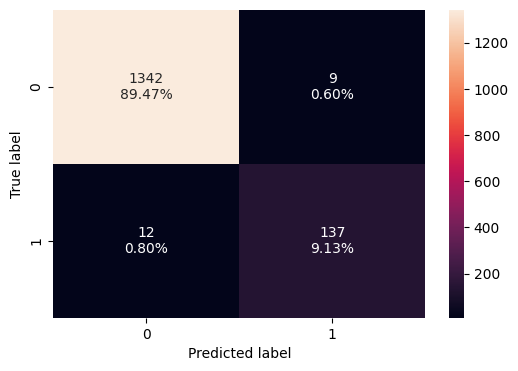

In [212]:
confusion_matrix_sklearn(model, X_test, y_test)

* the model shows excelent results on the training set and good results the test set

### Visualizing the Decision Tree

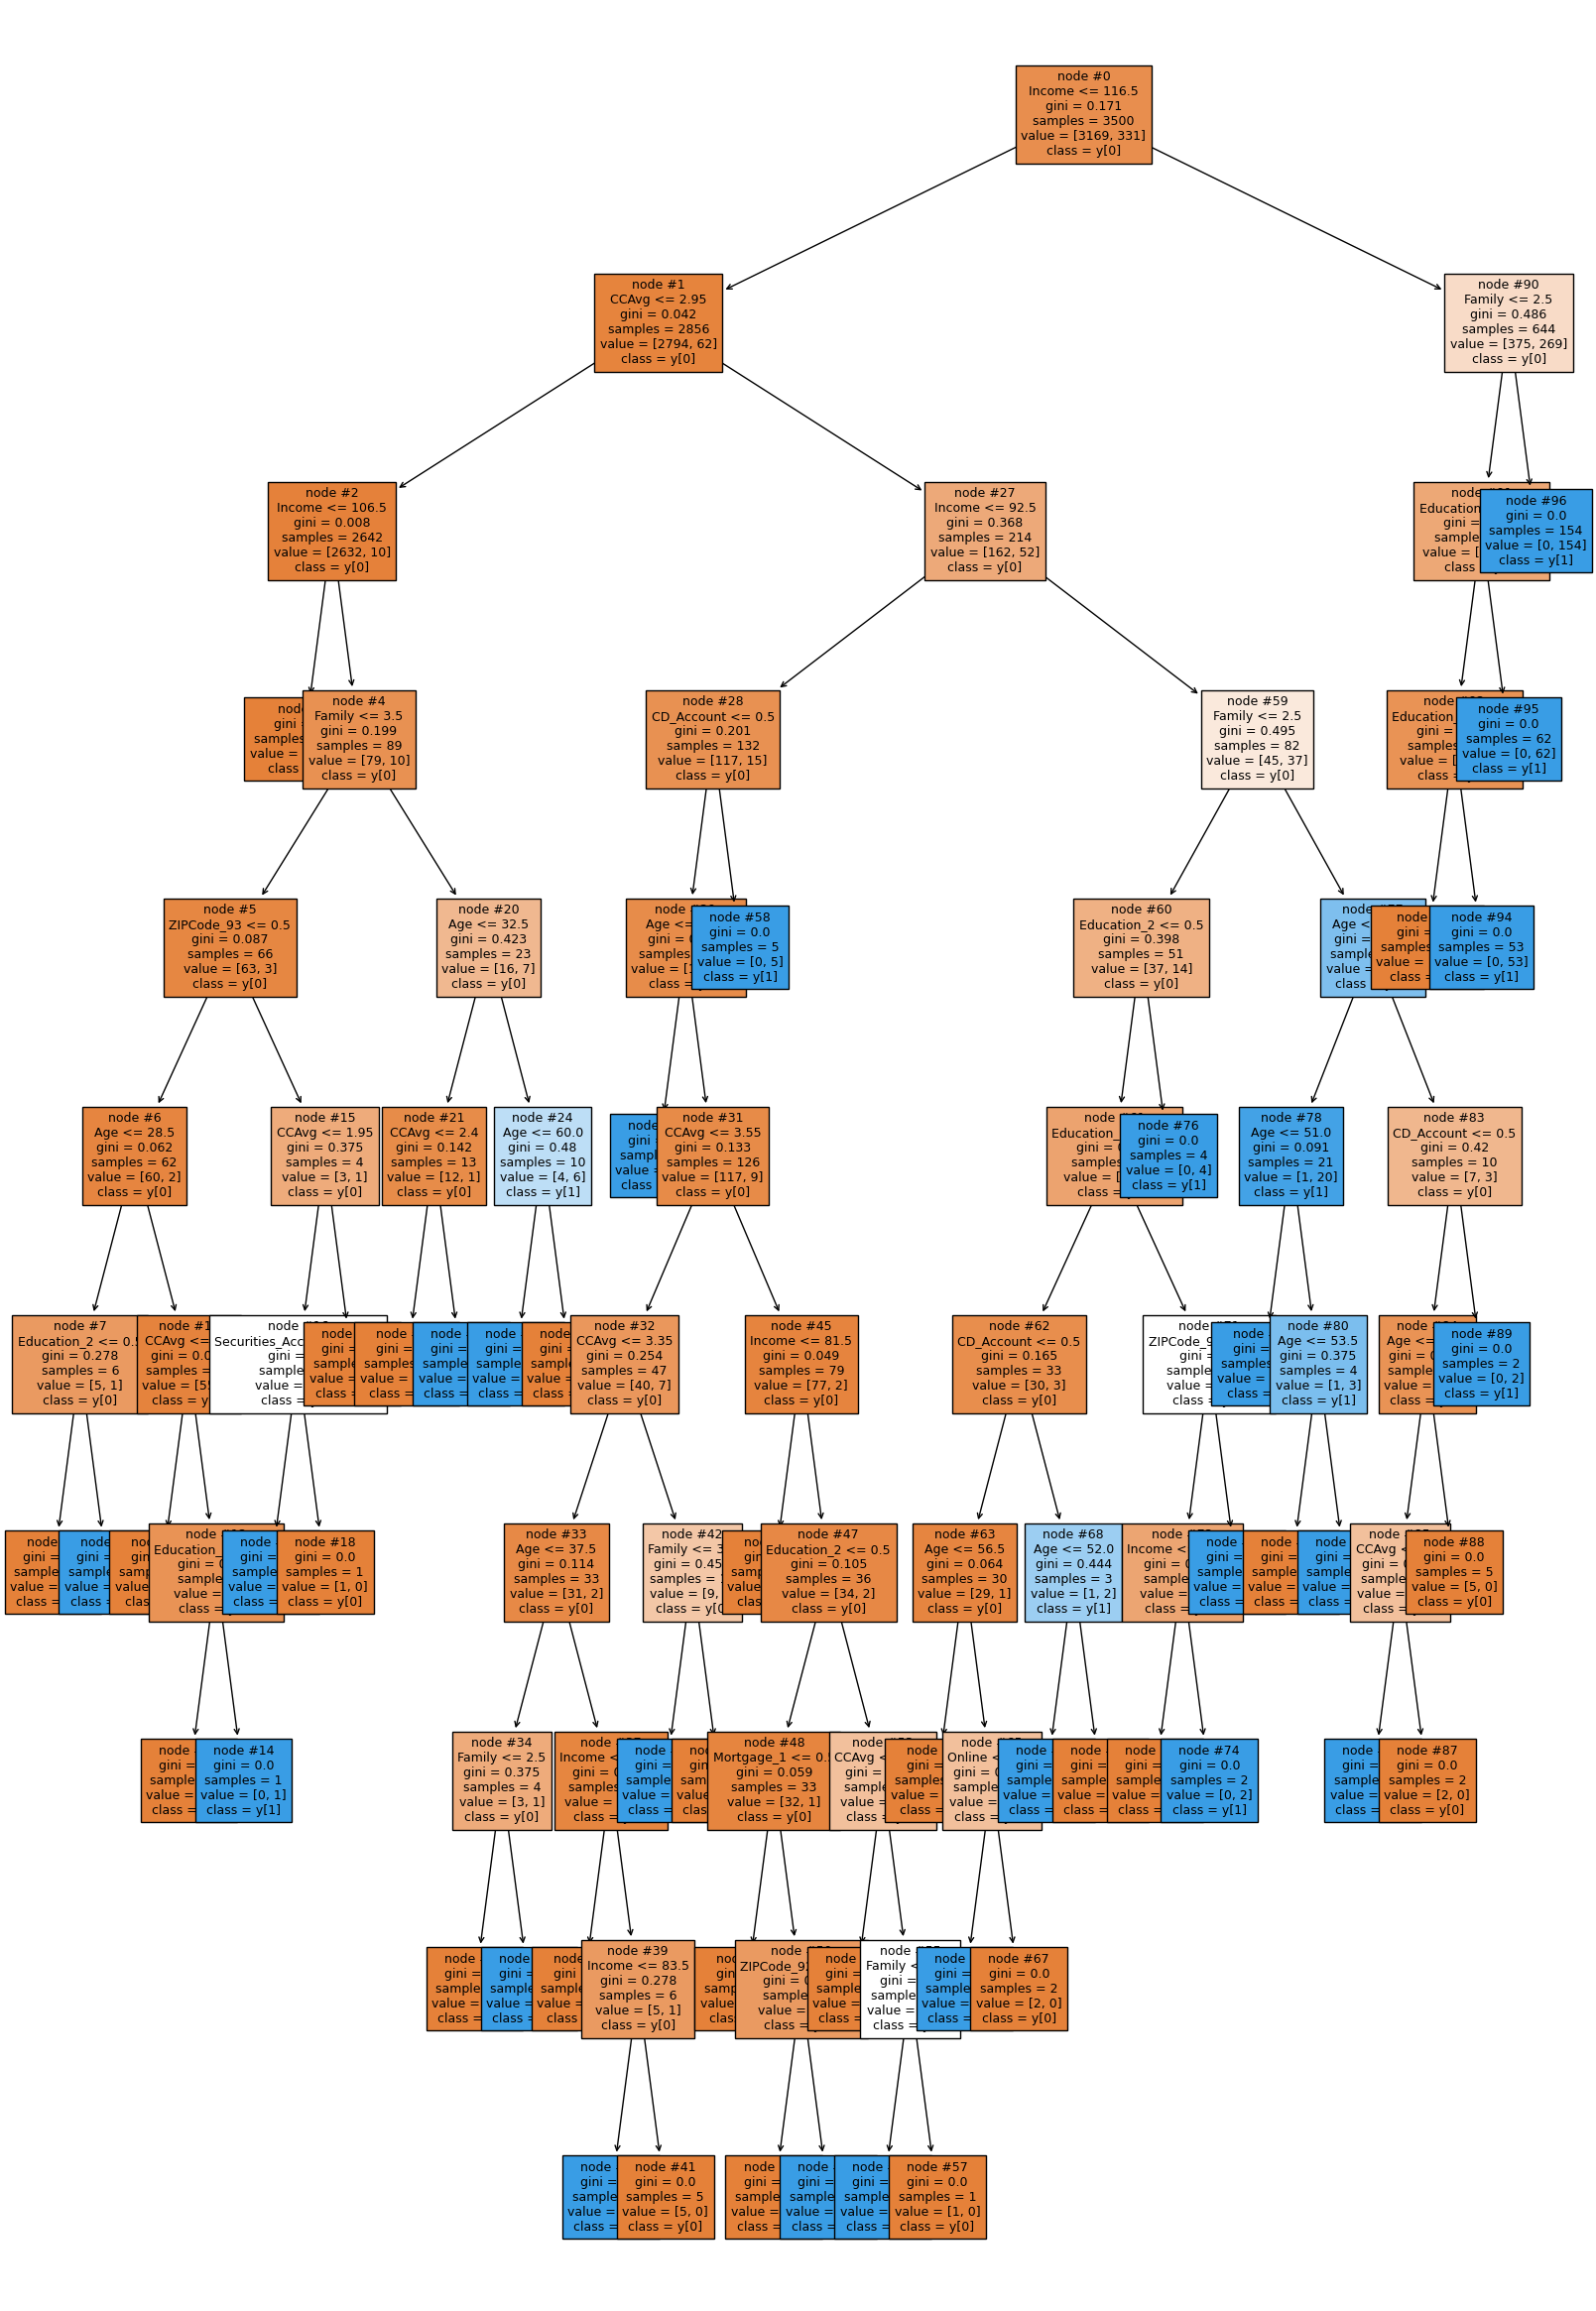

In [213]:
column_names = list(X.columns)

plt.figure(figsize=(20, 30))

out = tree.plot_tree(
    model,
    feature_names=column_names,
    filled=True,
    fontsize=9,
    node_ids=True,
    class_names=True,
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

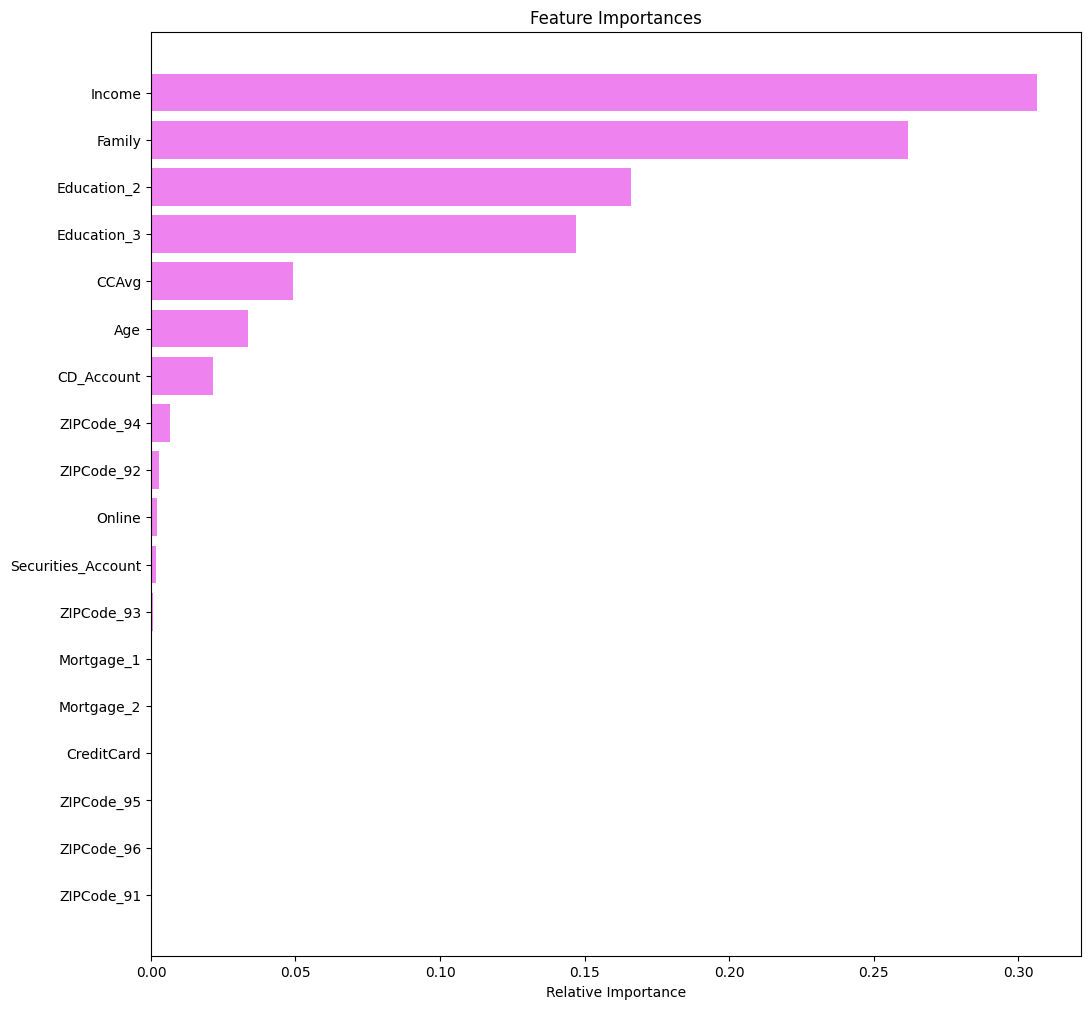

In [214]:
importances = model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [column_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

* Income, Family and Education are the most important features

### Model Performance Improvement

#### Pre-pruning

In [215]:
# Choose the type of classifier.
estimator = DecisionTreeClassifier(random_state=1)

# Grid of parameters to choose from

parameters = {
    "max_depth": [1,2,3,4,5,6,7,8,9,10,11,12,13,14,None],
    "criterion": ["entropy", "gini"],
    "splitter": ["best", "random"],
    "min_impurity_decrease": [0.000001, 0.00001, 0.0001],
}

# Type of scoring used to compare parameter combinations
# Choosing F1 score here to balance precision (not wasting marketing efforts on non-interested customers) and recall (identifying as many potential loan-buyers as possible)

acc_scorer = make_scorer(f1_score)

# Run the grid search
grid_obj = GridSearchCV(estimator, parameters, scoring=acc_scorer, cv=3)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
estimator.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=11,
                       min_impurity_decrease=1e-06, random_state=1)

##### Checking performance on training set

In [216]:
decision_tree_tune_perf_train = model_performance_classification_sklearn(
    estimator, X_train, y_train
)
decision_tree_tune_perf_train

Accuracy    Recall  Precision        F1
0  0.999143  0.990937        1.0  0.995448

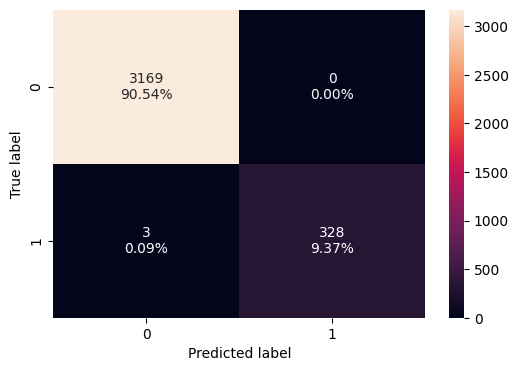

In [217]:
confusion_matrix_sklearn(estimator, X_train, y_train)

#### Checking model performance on test set

In [218]:
decision_tree_tune_perf_test = model_performance_classification_sklearn(
    estimator, X_test, y_test
)

decision_tree_tune_perf_test

Accuracy    Recall  Precision        F1
0     0.984  0.872483   0.962963  0.915493

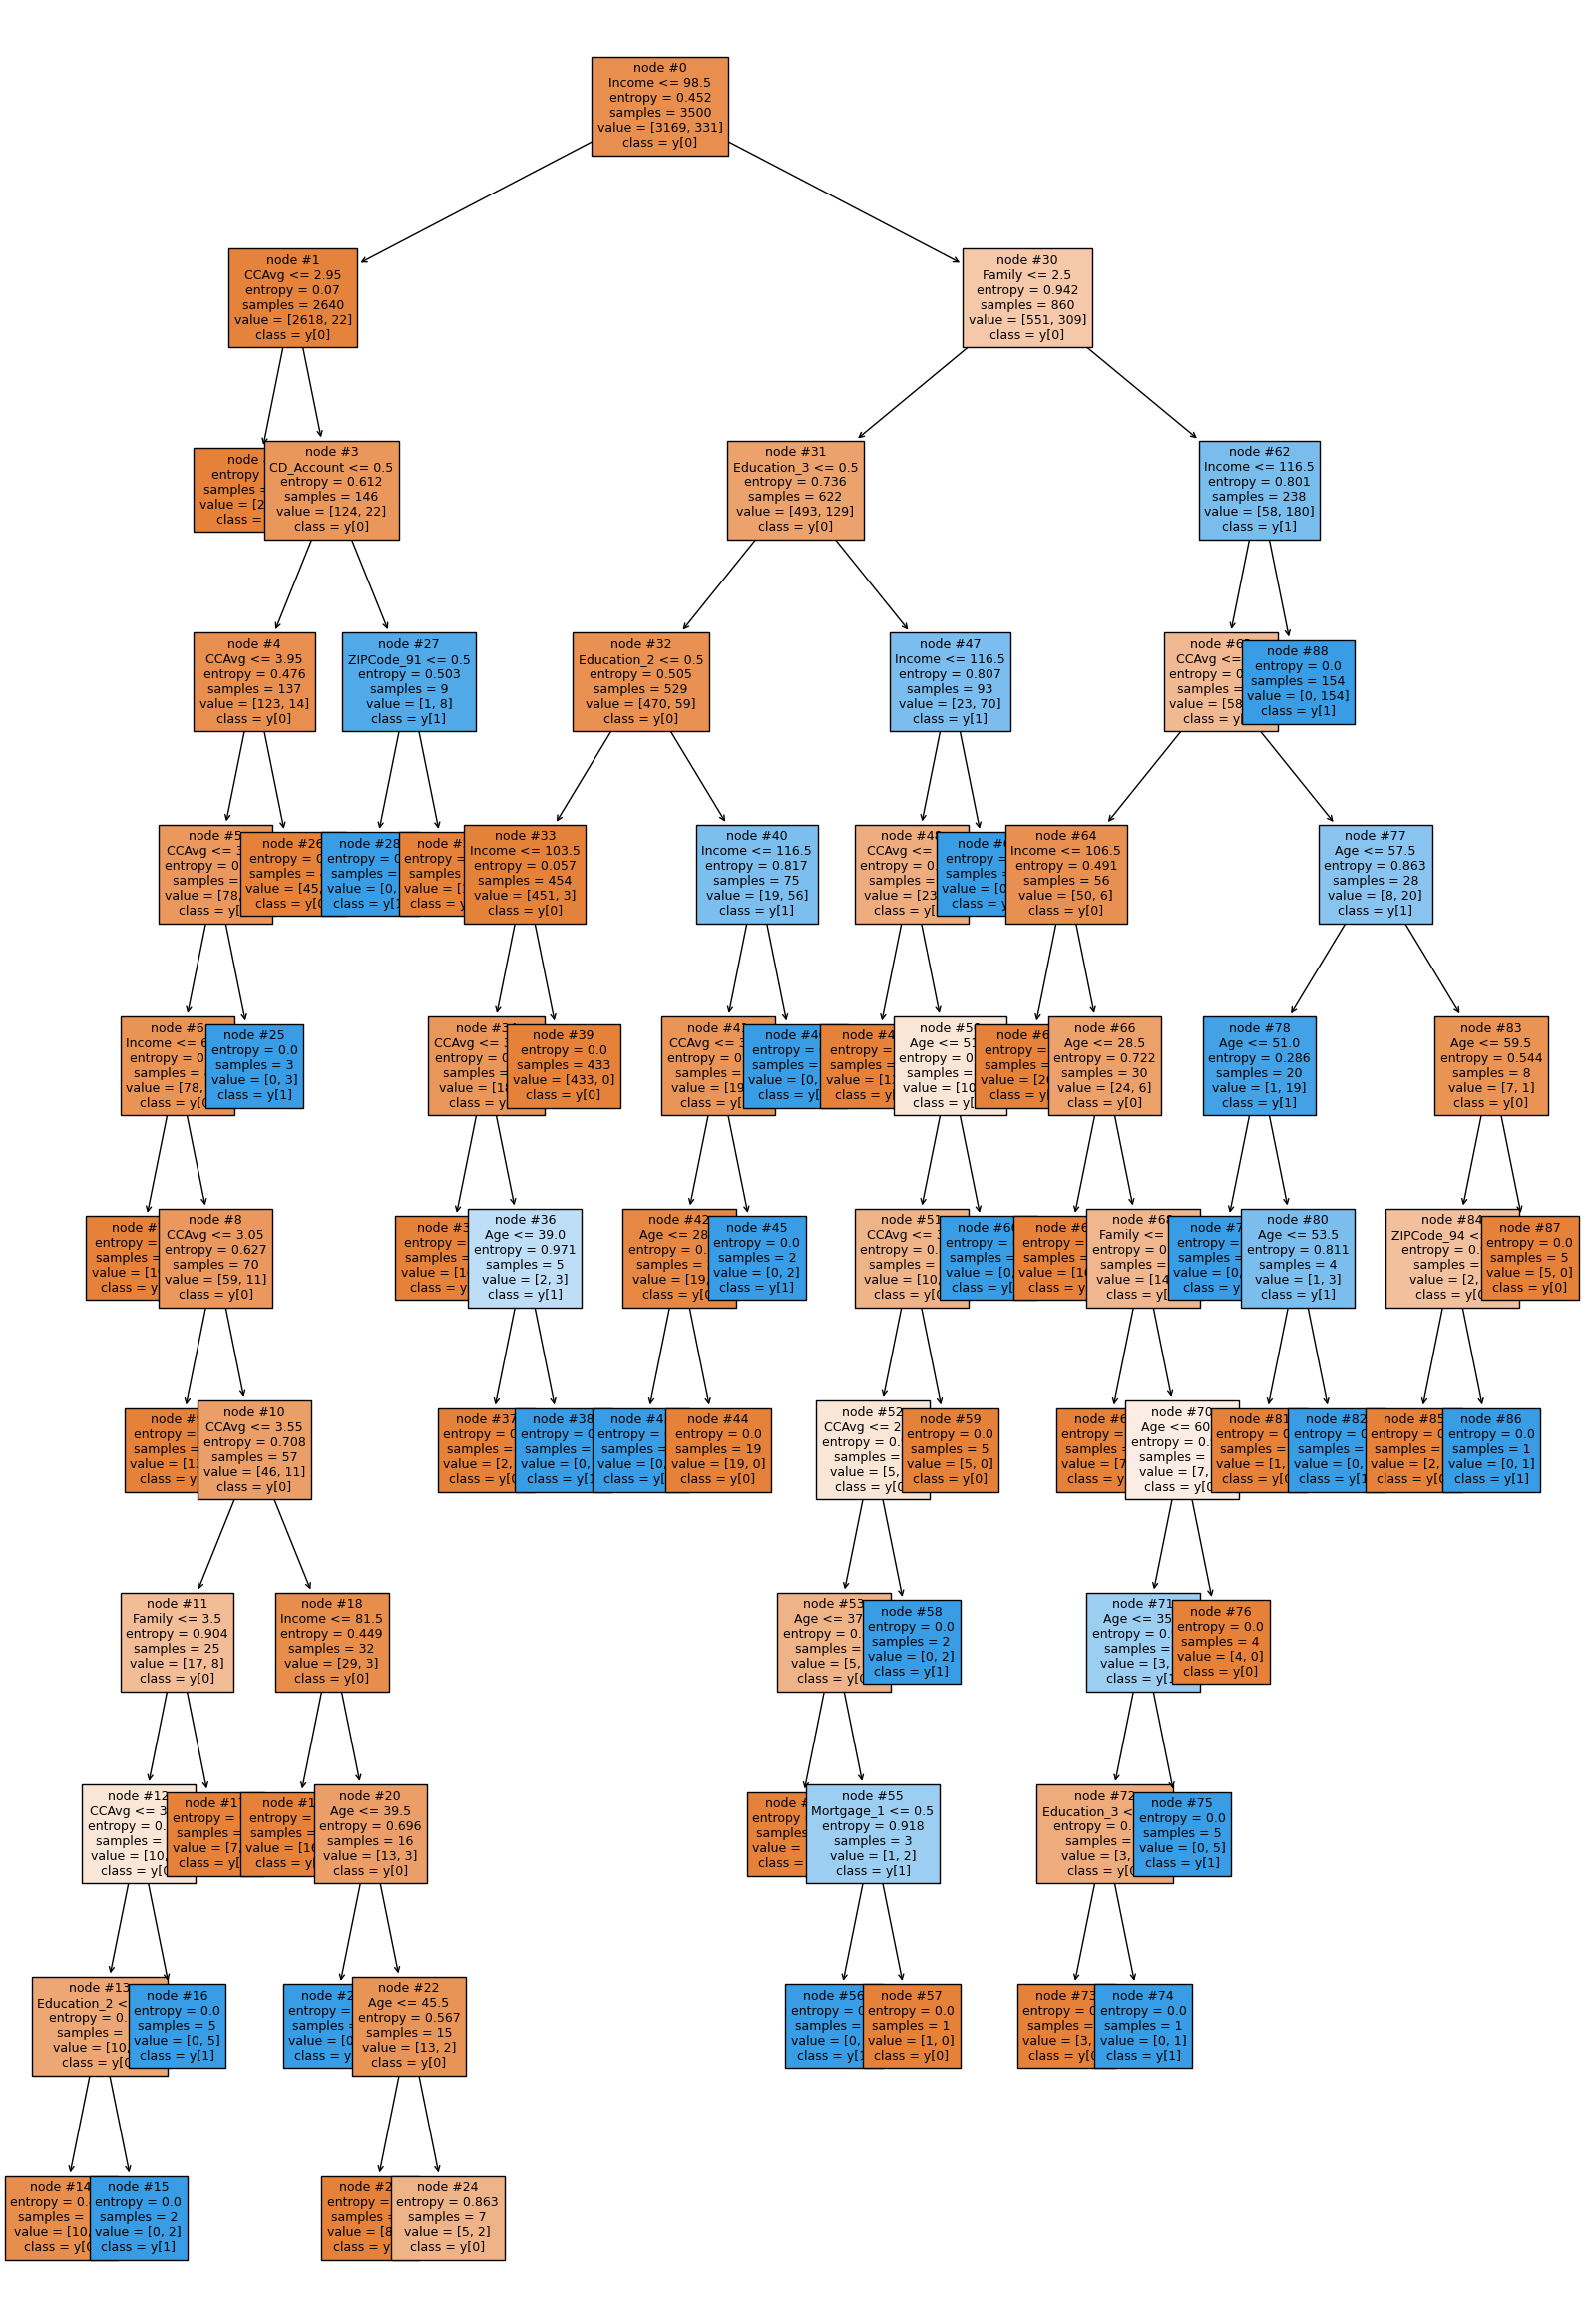

In [219]:
plt.figure(figsize=(20, 30))

tree.plot_tree(
    estimator,
    feature_names=column_names,
    filled=True,
    fontsize=9,
    node_ids=True,
    class_names=True,
)
plt.show()

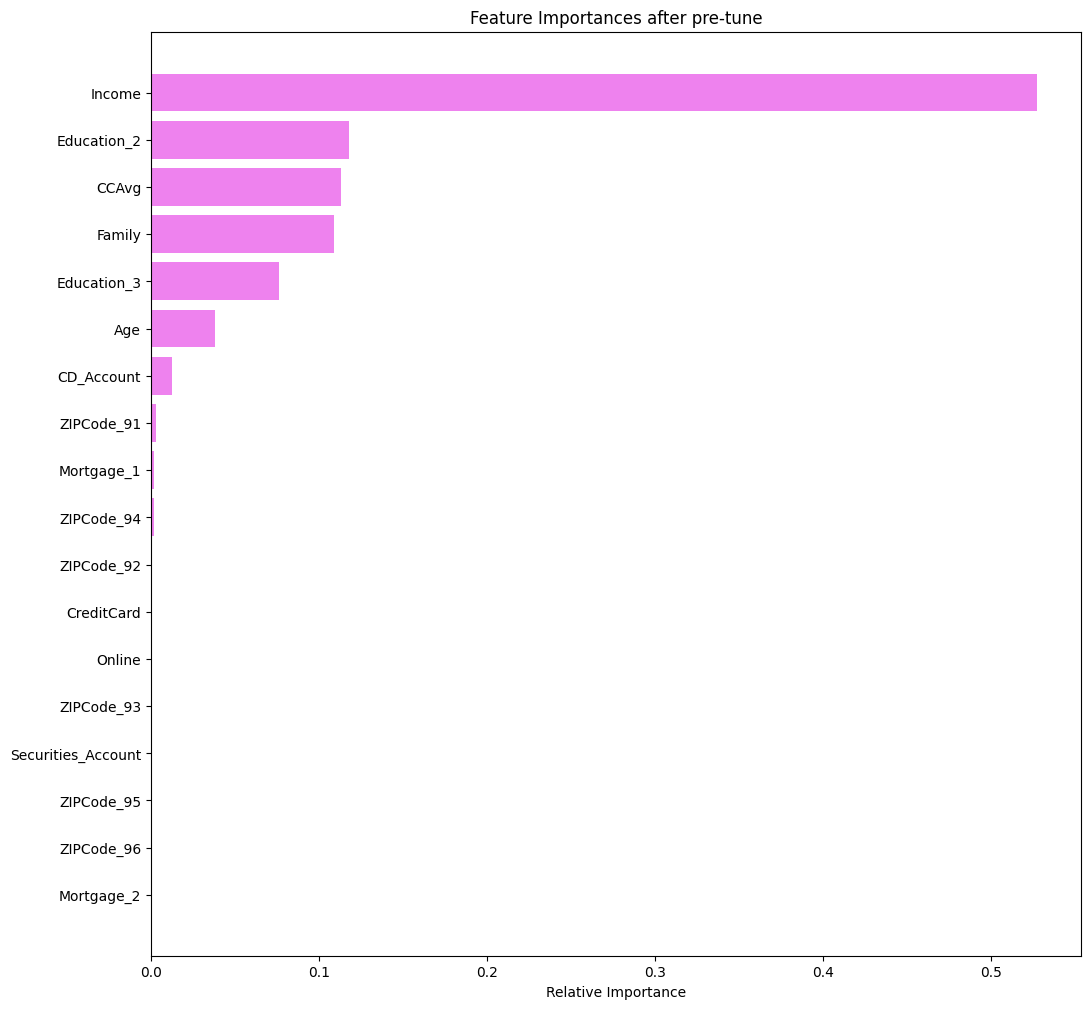

In [220]:
importances_tune = estimator.feature_importances_
indices = np.argsort(importances_tune)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances after pre-tune")
plt.barh(range(len(indices)), importances_tune[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [column_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

* After pre-tuning Income, whether customer is a Graduate and CCAvg are the most important features, and the performance on both training and test sets is worse than the previous model

#### Post-tuning

In [221]:
clf = DecisionTreeClassifier(random_state=1)
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [222]:
pd.DataFrame(path)

ccp_alphas  impurities
0     0.000000    0.000000
1     0.000186    0.001114
2     0.000214    0.001542
3     0.000242    0.002750
4     0.000250    0.003250
5     0.000268    0.004324
6     0.000272    0.004868
7     0.000276    0.005420
8     0.000381    0.005801
9     0.000527    0.006329
10    0.000625    0.006954
11    0.000700    0.007654
12    0.000769    0.010731
13    0.000882    0.014260
14    0.000889    0.015149
15    0.001026    0.017200
16    0.001305    0.018505
17    0.001647    0.020153
18    0.002333    0.022486
19    0.002407    0.024893
20    0.003294    0.028187
21    0.006473    0.034659
22    0.025146    0.084951
23    0.039216    0.124167
24    0.047088    0.171255

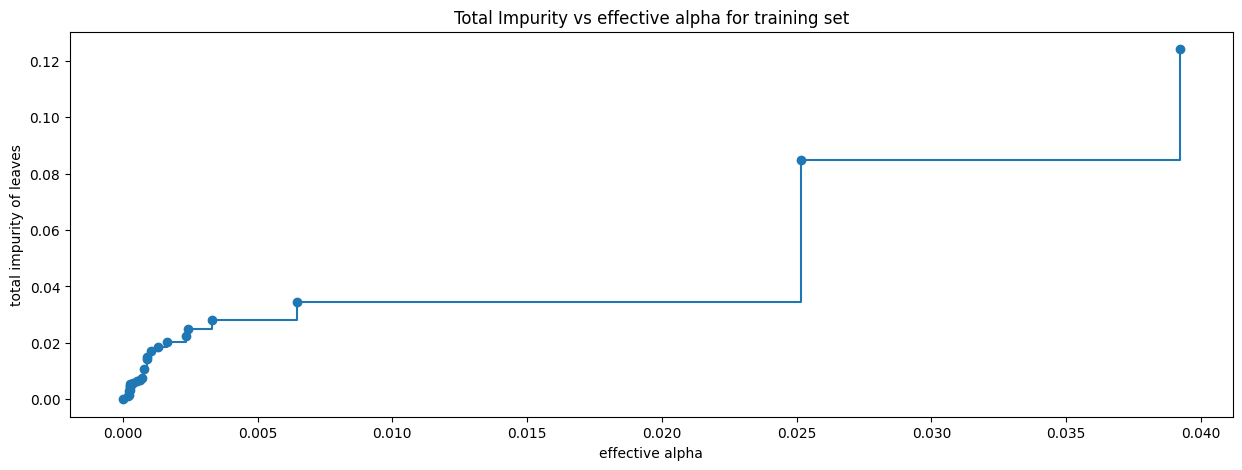

In [223]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

In [224]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=1, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is: 1 with ccp_alpha: 0.04708834100596766


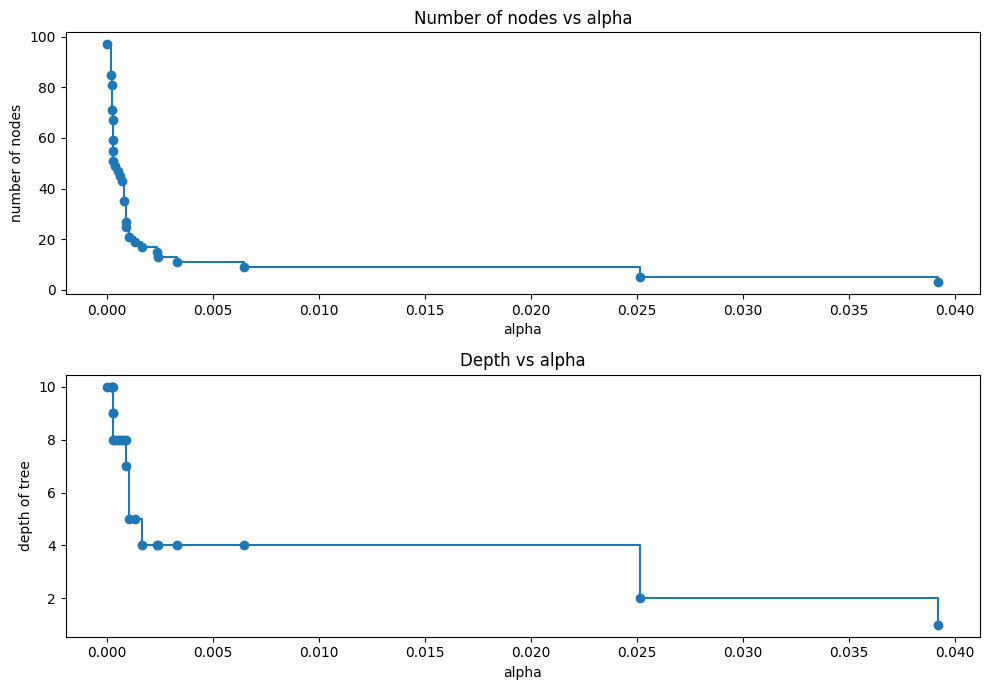

In [225]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1, figsize=(10, 7))
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

###F1 score vs alpha for training and testing sets

In [226]:
f1_train = []
for clf in clfs:
    pred_train = clf.predict(X_train)
    values_train = f1_score(y_train, pred_train)
    f1_train.append(values_train)

In [227]:
f1_test = []
for clf in clfs:
    pred_test = clf.predict(X_test)
    values_test = f1_score(y_test, pred_test)
    f1_test.append(values_test)

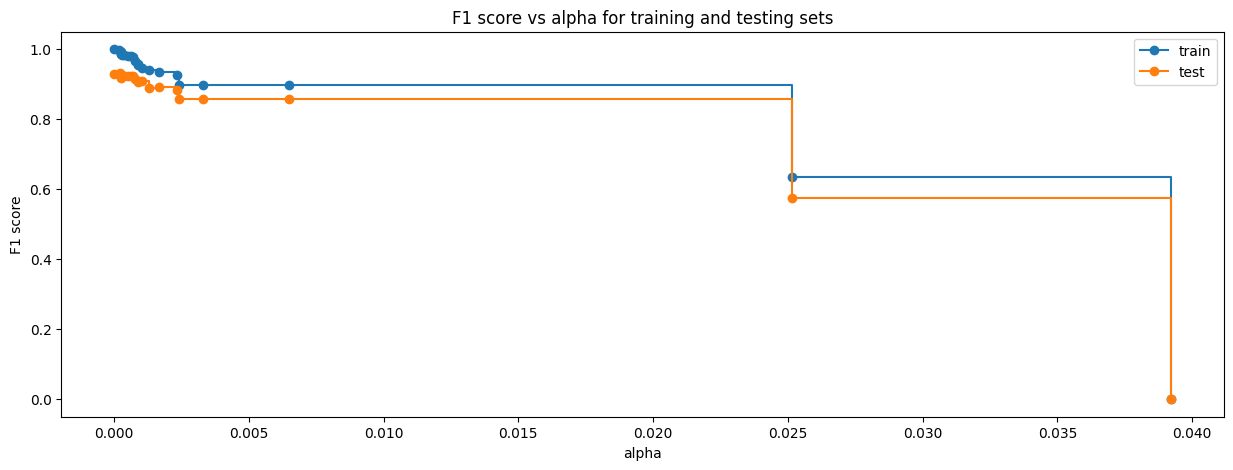

In [228]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.set_xlabel("alpha")
ax.set_ylabel("F1 score")
ax.set_title("F1 score vs alpha for training and testing sets")
ax.plot(ccp_alphas, f1_train, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, f1_test, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

In [229]:
# best model accorting to f1 scores on test set
index_best_model_f1 = np.argmax(f1_test)
best_model_f1 = clfs[index_best_model_f1]
print(best_model_f1)

DecisionTreeClassifier(ccp_alpha=0.00021428571428571427, random_state=1)


##### Checking performance on training set

In [230]:
decision_tree_postpruned_perf_train = model_performance_classification_sklearn(
    best_model_f1, X_train, y_train
)
decision_tree_postpruned_perf_train

Accuracy    Recall  Precision        F1
0  0.999143  0.990937        1.0  0.995448

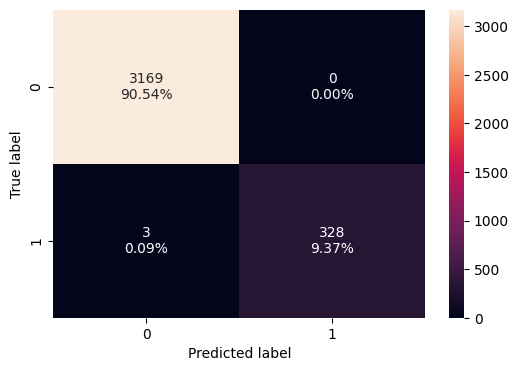

In [231]:
confusion_matrix_sklearn(best_model_f1, X_train, y_train)

##### Checking performance on test set

In [232]:
decision_tree_postpruned_perf_test = model_performance_classification_sklearn(
    best_model_f1, X_test, y_test
)
decision_tree_postpruned_perf_test

Accuracy    Recall  Precision        F1
0  0.986667  0.912752   0.951049  0.931507

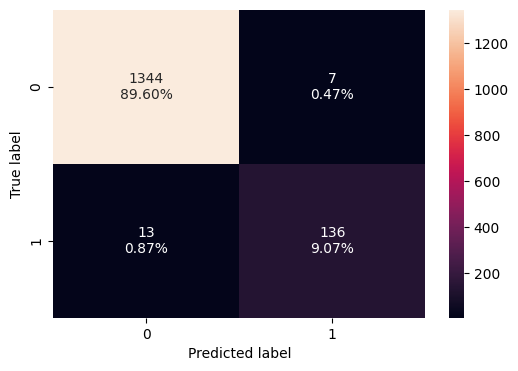

In [233]:
confusion_matrix_sklearn(best_model_f1, X_test, y_test)

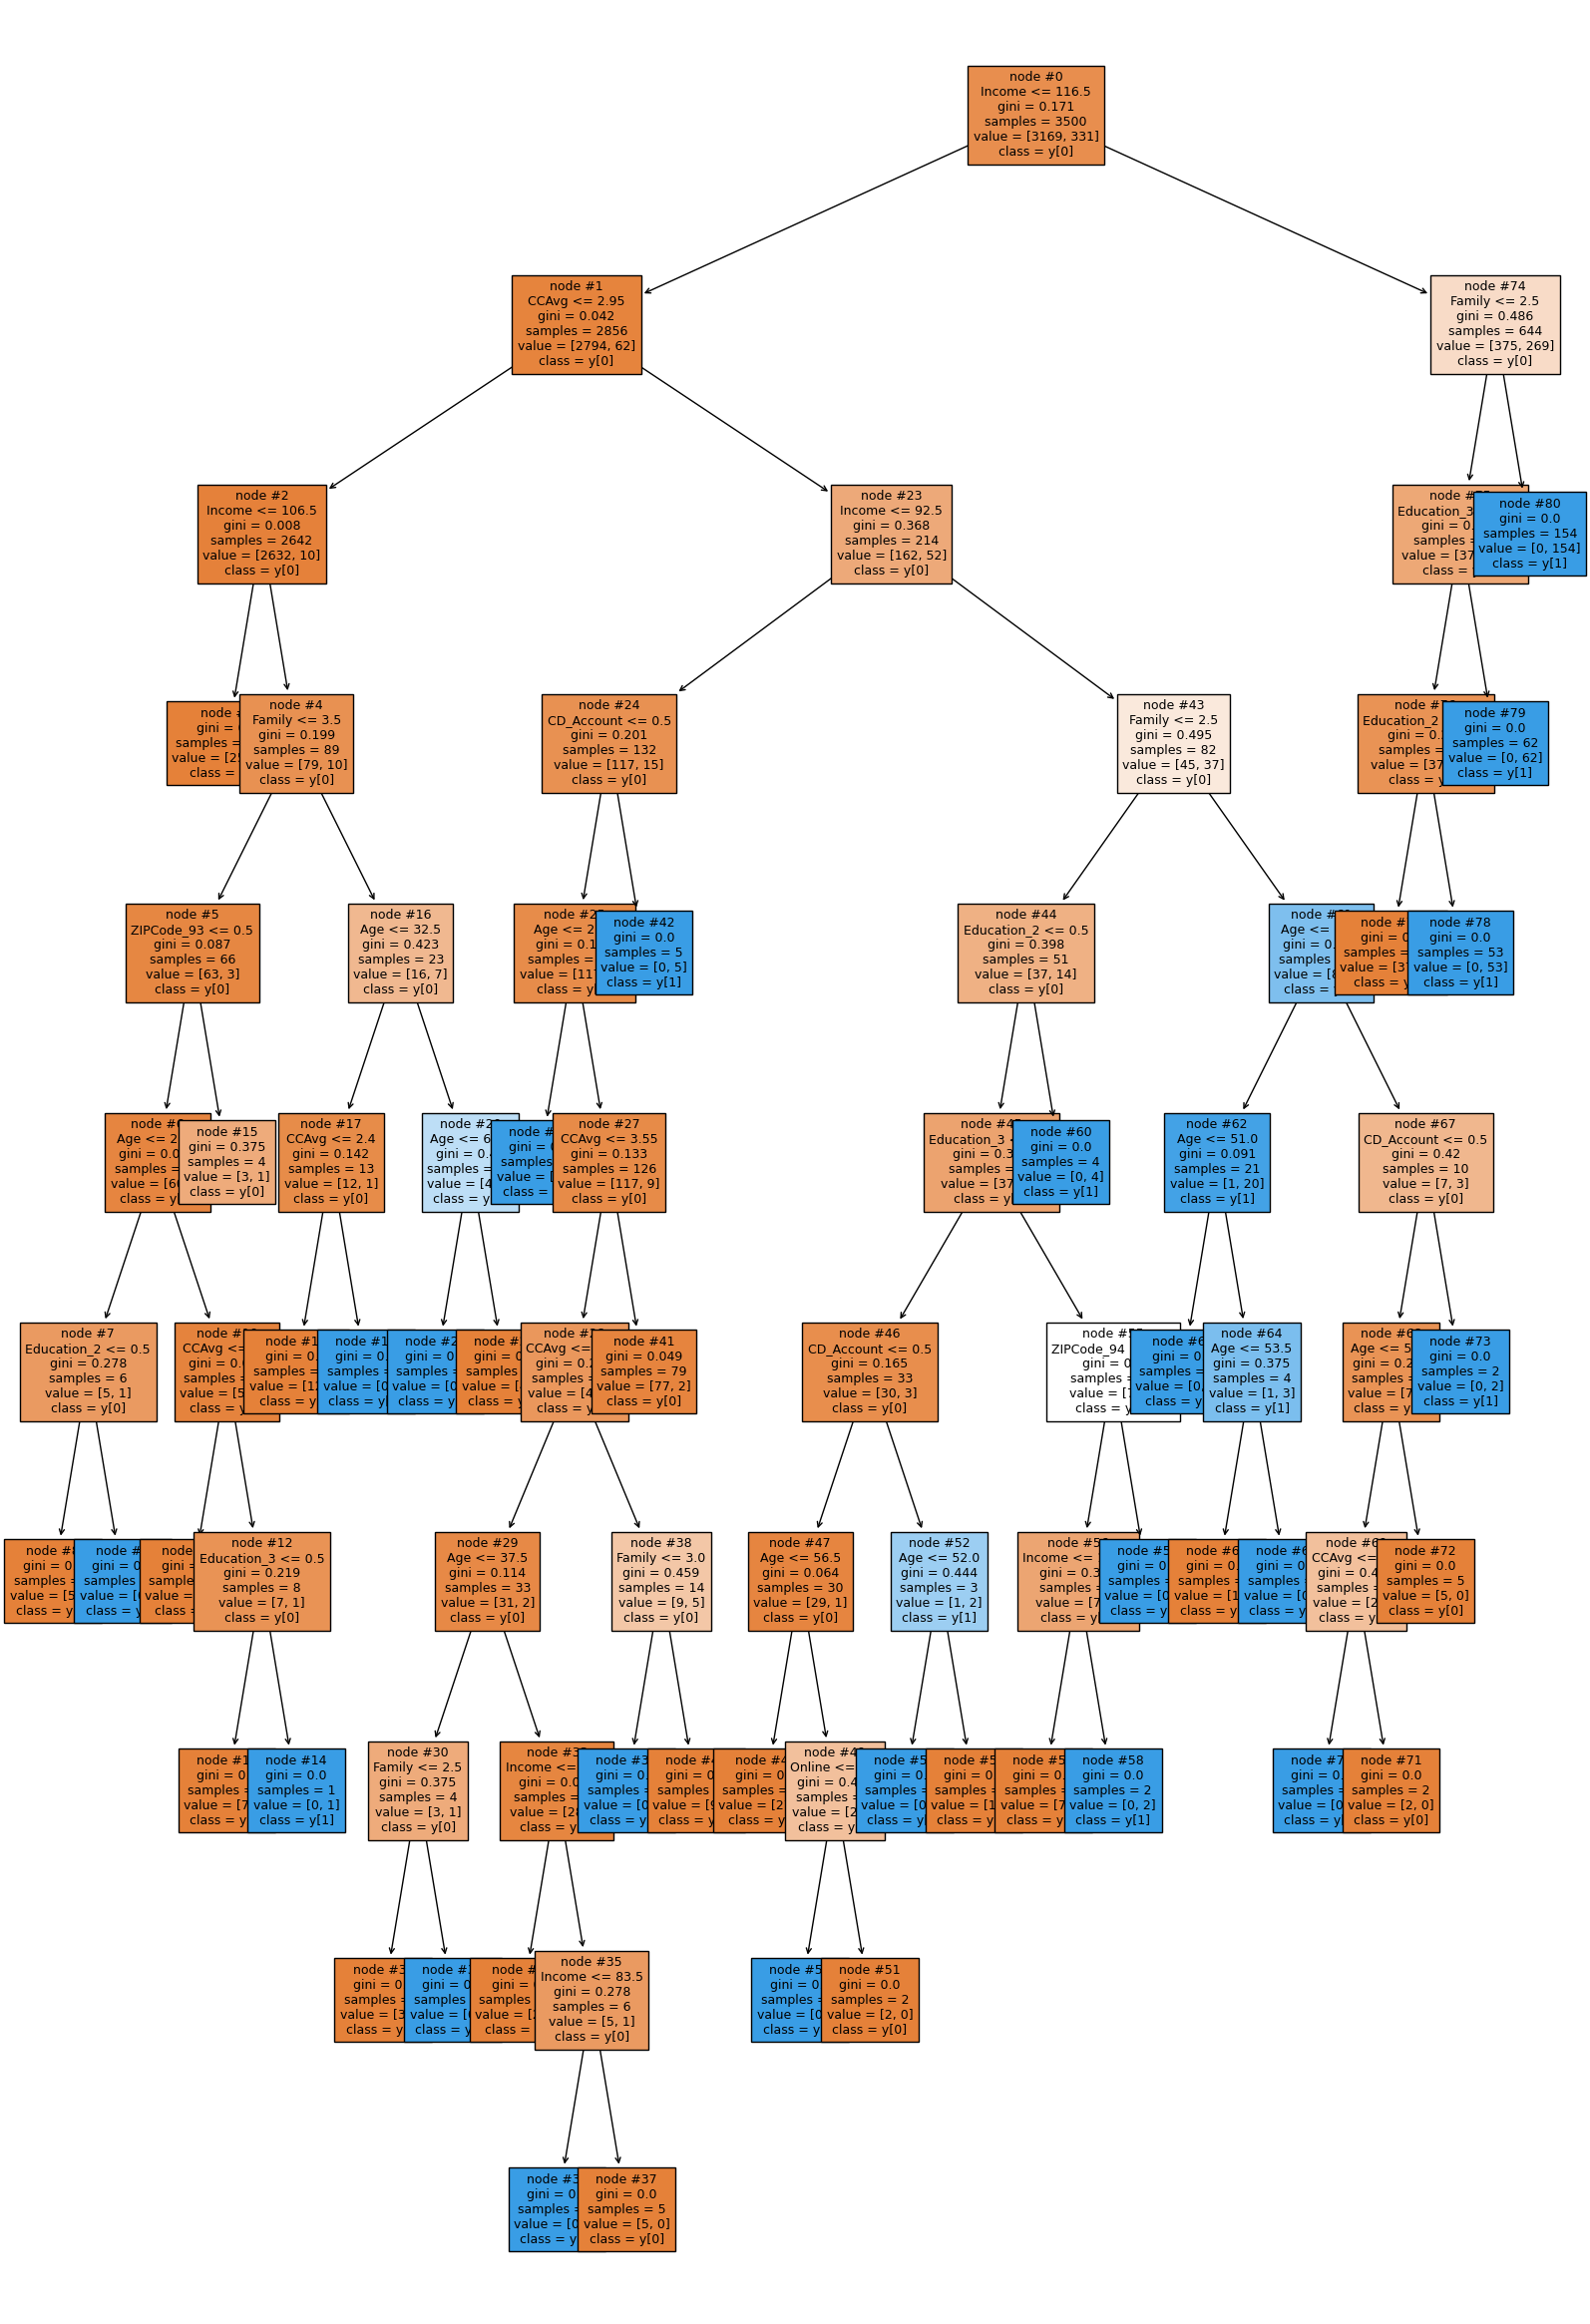

In [234]:
plt.figure(figsize=(20, 30))

tree.plot_tree(
    best_model_f1,
    feature_names=column_names,
    filled=True,
    fontsize=9,
    node_ids=True,
    class_names=True,
)
plt.show()

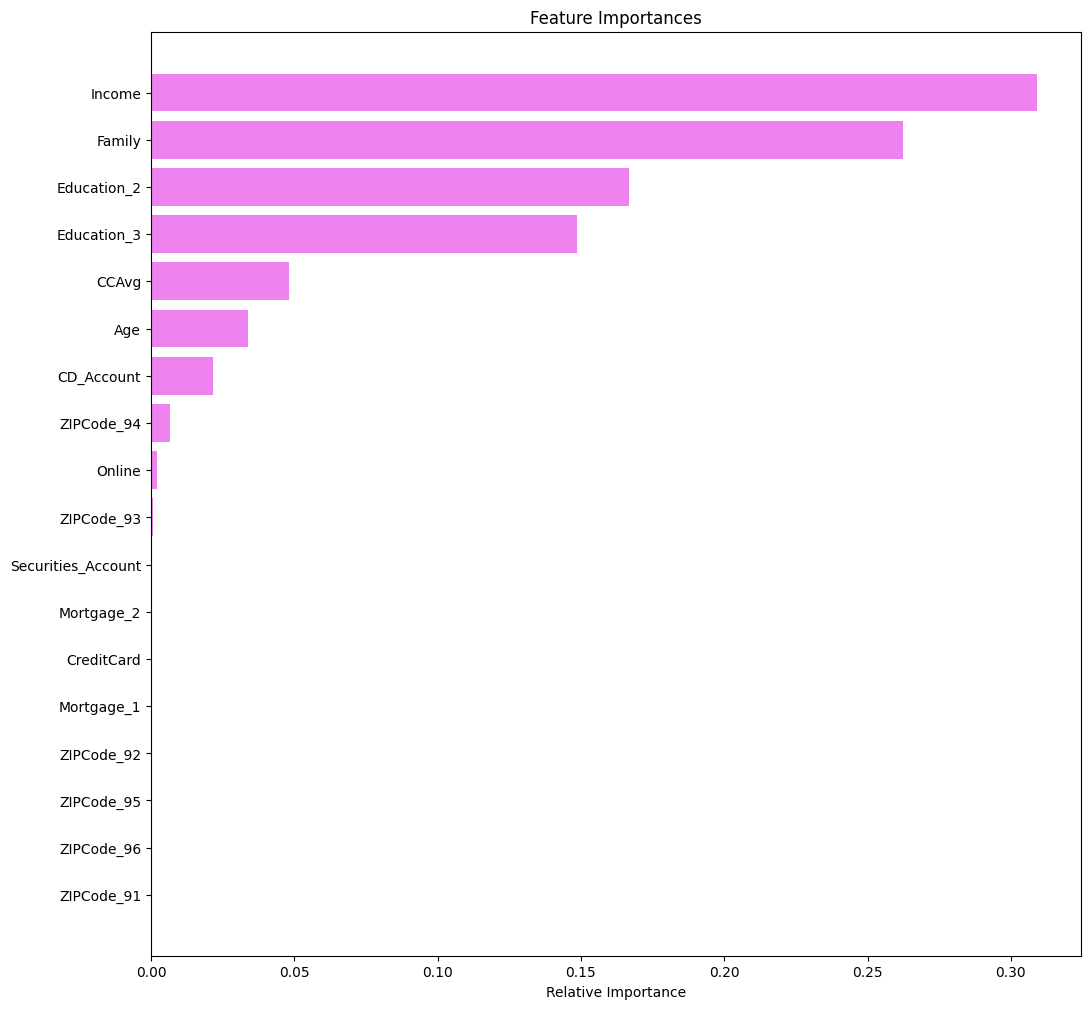

In [235]:
importances = best_model_f1.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [column_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

* Income, Family and Education are the most important features after post-pruning

## Model Comparison and Final Model Selection

In [236]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        decision_tree_perf_train.T,
        decision_tree_tune_perf_train.T,
        decision_tree_postpruned_perf_train.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree sklearn",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


Decision Tree sklearn  Decision Tree (Pre-Pruning)  \
Accuracy                     1.0                     0.999143   
Recall                       1.0                     0.990937   
Precision                    1.0                     1.000000   
F1                           1.0                     0.995448   

           Decision Tree (Post-Pruning)  
Accuracy                       0.999143  
Recall                         0.990937  
Precision                      1.000000  
F1                             0.995448

In [237]:
# test performance comparison

models_train_comp_df = pd.concat(
    [
        decision_tree_perf_test.T,
        decision_tree_tune_perf_test.T,
        decision_tree_postpruned_perf_test.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree sklearn",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
]
print("Test set performance comparison:")
models_train_comp_df

Test set performance comparison:


Decision Tree sklearn  Decision Tree (Pre-Pruning)  \
Accuracy                0.986000                     0.984000   
Recall                  0.919463                     0.872483   
Precision               0.938356                     0.962963   
F1                      0.928814                     0.915493   

           Decision Tree (Post-Pruning)  
Accuracy                       0.986667  
Recall                         0.912752  
Precision                      0.951049  
F1                             0.931507

* Neither pre-pruning nor post-pruning simplified the tree much, both remained rather complex
* Recall of the pre-pruned tree is the lowest, so this is definitely not our choice
* Post-pruning gave us increased Accuracy, Precision and F1 scores, but Recall slightly decreased
* I would say a discussion with stake-holders should be held, to understand whether we need to get the maximum possible number of identified loan buyers in exchange for potentially wasted marketing resources (increased false positives), or we can tolerate the slight decrease of Recall in the post-pruned tree in order to a bit minimize wasting the marketing resources. If we need a balance here - post-pruned tree is our selection

## Actionable Insights and Business Recommendations


* From the decision tree models we can see that Income, Family and Education are the most important features.
* If we add results of the EDA to it, it seems that the customers that should be targeted:
  - Should earn at least 60 thousand annually
  - Should have a partner and kids
  - Should be Graduates or Professionals

* Additional criterias that can be used to further narrow down the target group:
  - Customers should be between 26 and 65 years old
  - Customers with higher average spending on credit cards (75% of customers who accepted the loan before had the spending of more than 2.6 thousand)

* Geography of the customer, having a mortgage, having a securities account and usage of online banking and having credit cards issued by other banks doesn't influence acceptance of the loan


In [238]:
%%shell
jupyter nbconvert --to html /content/AIML_ML_Project_full_code_notebook_Antonova.ipynb

[NbConvertApp] Converting notebook /content/AIML_ML_Project_full_code_notebook_Antonova.ipynb to html
[NbConvertApp] Writing 6659208 bytes to /content/AIML_ML_Project_full_code_notebook_Antonova.html


___